# Capstone Project - The Battle of Neighborhoods (Week 2)

# I Introduction

**I** *nvestment is in general a complex and challenging task.One of the most difficulty is to collect right data.Today there are certainly lots of data sources thanks to internet data centers developpement ,data processing technologies  which make it possible to collect, process and store data in real time.Although these technologies are present in our day life and  more often availables as open source tools,they still need to be carefully used in other to obtain right data.*


# 1.1 Problem

 **T** *he problem as set consists collecting ,porcessing and  analyzing the cities* **NEW YORK CITY, Toronto And Paris**. *More precisely ,the problem is about Collecting informations about all the venues  of different neighborhood of all borough in each of these cities in order to find the similarities between them base on data collected using data anlysis tools ,here is python and external API such as foursquar.The result obtained results will be use to   suggest a suitable location for investment .*


## 1.2 interest 

**Evidently,interested are either poeple interested in investing in one of these tree cities or somme one willing to know a litle bit about kaind of venues in these cities**

## 1.3 Data socuces 

### 1.3.1 problem 1 Cities anlysis
  **1.3.1.1-NYC(new york city) all data where provided link_to_data_set:** https://cocl.us/new_york_dataset

   *From this link data are download ,loded usind python api pandas ,process and transform into usable data format. The foursquare API is then used to generate the final data set including geografical coordinate of each neighbouhood.Thinal data set in the generated (Data frame including geographical coordinates of each neighborhood*

   **1.3.1.2 -Toronto links To dataset:** -https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M -http://cocl.us/Geospatial_data**

   *From this link data are download ,loded usind python api pandas ,process and transform into usable data format. The foursquare API is then used to generate the final data set including geografical coordinate of each  neighbouhood.Thinal data set in the generated (Data frame including geographical coordinates of each neighborhood.*

   **1.3.1.3 Paris links to data sets:** https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris [https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true&csv_separator=%3B

   *From this link data are download ,loded usind python api pandas ,process and transform into usable data format. The foursquare API is then used to generate the final data set including geografical coordinate of each neighbouhood.Thinal data set in the generated (Data frame including geographical coordinates of each neighborhood*

### 1.3.2  Problem 2 (venue sugestion for ristaurant investment)
   *data set used here is the results of the data collected and transform (using python and foursquere api) into strutured and usable data format in the previous section*

# II-Data collection , processing and anlysis for each city 

## II-1 New York City


**AS** *previously said,data are collected from links provided,the programming language used is python on IMD cloud,more precisely  IBM service.Thanks to these tools we have colletted and tranformed data from unusable data forrmat to structured data frame.Below is the scrreshut of the final data structure where in the columns we have from  left to right exactly :Borough's name ,Neighborhood's name ,Latitude and Longitude  of the overall newyork city .*


In [1]:
!pip install seaborn 
import numpy as np # library to handle data in a vectorized manner
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

# 1. Download Newyork city  and Explore Dataset


In [23]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [24]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [9]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [25]:
neighborhoods_data = newyork_data['features']

In [11]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [26]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [9]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [36]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [11]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [27]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 0 boroughs and 0 neighborhoods.


In [28]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 0 boroughs and 0 neighborhoods.


In [29]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [30]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
map_newyork

In [41]:
NC_data = neighborhoods
NC_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

# Foursquare API credentials setting

In [32]:
CLIENT_ID = 'BF3KRSJVJ00WI2KN5ODMGWHPFKO5JEXD1XJV0TUEOH42TPRK' # your Foursquare ID
CLIENT_SECRET = 'QD31EF0JNJHJCX0FH4UOMEJDSWQ4AK5IDFP1PATDKGJGSK4W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BF3KRSJVJ00WI2KN5ODMGWHPFKO5JEXD1XJV0TUEOH42TPRK
CLIENT_SECRET:QD31EF0JNJHJCX0FH4UOMEJDSWQ4AK5IDFP1PATDKGJGSK4W


In [39]:
NC_data.head()

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [40]:
NC_data.shape

(0, 4)

In [42]:
NC_data.loc[0, 'Neighborhood']

'Wakefield'

In [43]:
NC_latitude = NC_data.loc[0, 'Latitude'] # neighborhood latitude value
NC_longitude = NC_data.loc[0, 'Longitude'] # neighborhood longitude value

NC_name = NC_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(NC_name, 
                                                               NC_latitude, 
                                                               NC_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [44]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    NC_latitude, 
    NC_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=BF3KRSJVJ00WI2KN5ODMGWHPFKO5JEXD1XJV0TUEOH42TPRK&client_secret=QD31EF0JNJHJCX0FH4UOMEJDSWQ4AK5IDFP1PATDKGJGSK4W&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [45]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e414d9caba2977c4b171236'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

In [46]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [47]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name      categories        lat        lng
0  Lollipops Gelato    Dessert Shop  40.894123 -73.845892
1          Rite Aid        Pharmacy  40.896649 -73.844846
2  Carvel Ice Cream  Ice Cream Shop  40.890487 -73.848568
3           Dunkin'      Donut Shop  40.890459 -73.849089
4             Shell     Gas Station  40.894187 -73.845862

In [48]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
# type your answer here
NCbola=1
while NCbola==1:
    try:
        NC_venues = getNearbyVenues(names=NC_data['Neighborhood'],
                                   latitudes=NC_data['Latitude'],
                                   longitudes=NC_data['Longitude'])
        NCbola=0
    except:
        NCbola=1
        

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [61]:
print(NC_venues.shape)
NC_venues.head()

(10256, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3           Dunkin'       40.890459       -73.849089      Donut Shop  
4             Shell       40.894187       -73.845862     Gas Station

In [63]:
NC_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      30                      30   
Annadale                                      10                      10   
Arden Heights                                  4                       4   
Arlington                                      5                       5   
Arrochar                                      18                      18   
Arverne                                       17                      17   
Astoria                                      100                     100   
Astoria Heights                               12                      12   
Auburndale                                    20                      20   
Bath Beach                                    48                      48   
Battery Park City                            100                     100   
Bay Ridge                                     88                      88   
Bay Terrace                                   47                      47   
Baychester                                    22                      22   
Bayside                                       75                      75   
Bayswater                                      3                       3   
Bedford Park                                  33                      33   
Bedford Stuyvesant                            27                      27   
Beechhurst                                    12                      12   
Bellaire                                      12                      12   
Belle Harbor                                  17                      17   
Bellerose                                     21                      21   
Belmont                                      100                     100   
Bensonhurst                                   33                      33   
Bergen Beach                                   7                       7   
Blissville                                    17                      17   
Bloomfield                                     5                       5   
Boerum Hill                                   91                      91   
Borough Park                                  20                      20   
Breezy Point                                   3                       3   
Briarwood                                     11                      11   
Brighton Beach                                45                      45   
Broad Channel                                  5                       5   
Broadway Junction                             15                      15   
Bronxdale                                     13                      13   
Brooklyn Heights                             100                     100   
Brookville                                     1                       1   
Brownsville                                   22                      22   
Bulls Head                                    44                      44   
Bushwick                                      74                      74   
Butler Manor                                   5                       5   
Cambria Heights                               12                      12   
Canarsie                                       7                       7   
Carnegie Hill                                 99                      99   
Carroll Gardens                              100                     100   
Castle Hill                                    9                       9   
Castleton Corners                             15                      15   
Central Harlem                                44                      44   
Charleston                                    28                      28   
Chelsea                                      107                     107   
Chinatown                                    100                     100   

In [64]:
# let count the total number of restaurant
def restaurantList(venues):
    ListOfRestaurant=[]
    for elt  in venues:
        if elt.find("Restaurant")!=-1:
             ListOfRestaurant.append(elt)
    return ListOfRestaurant

In [65]:
NC_restaut=restaurantList(NC_venues["Venue Category"].to_numpy())

In [66]:
NC_restaut

['Caribbean Restaurant',
 'Fast Food Restaurant',
 'Restaurant',
 'Caribbean Restaurant',
 'Seafood Restaurant',
 'Caribbean Restaurant',
 'Caribbean Restaurant',
 'Fast Food Restaurant',
 'Chinese Restaurant',
 'Latin American Restaurant',
 'Caribbean Restaurant',
 'Spanish Restaurant',
 'Mexican Restaurant',
 'Mexican Restaurant',
 'Mexican Restaurant',
 'Spanish Restaurant',
 'Seafood Restaurant',
 'Latin American Restaurant',
 'Latin American Restaurant',
 'Fast Food Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Chinese Restaurant',
 'Seafood Restaurant',
 'American Restaurant',
 'Italian Restaurant',
 'Indian Restaurant',
 'American Restaurant',
 'Mexican Restaurant',
 'Restaurant',
 'Caribbean Restaurant',
 'Fast Food Restaurant',
 'Spanish Restaurant',
 'Chinese Restaurant',
 'American Restaurant',
 'Chinese Restaurant',
 'Caribbean Restaurant',
 'Caribbean Restaurant',
 'Spanish Restaurant',
 'Mexican Restaurant',
 'Fast Food Restaurant',
 'Italian Restaurant',
 'Chinese Res

In [67]:
#total  number of restaurant 
len(NC_restaut)

2580

In [68]:
#restaurant density 
NC_resdensy=2580/8398748
NC_resdensy

0.0003071886428786767

In [69]:
# count each reataurant occurrence in the list
from collections import Counter
ConteurRestau=Counter(NC_restaut)

In [70]:
NC_UniqueRestaurant=set(NC_restaut)
NC_UniqueRestaurant


{'Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'Brazilian Restaurant',
 'Cajun / Creole Restaurant',
 'Cambodian Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Egyptian Restaurant',
 'Empanada Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Himalayan Restaurant',
 'Hotpot Restaurant',
 'Hunan Restaurant',
 'Indian Chinese Restaurant',
 'Indian Restaurant',
 'Indonesian Restaurant',
 'Israeli

In [71]:
len(NC_UniqueRestaurant)

92

In [72]:
#let filter the data set containing ongly  restauraant
NC_mask = NC_venues["Venue Category"].isin(NC_UniqueRestaurant)
NC_filtered=NC_venues[NC_mask]

In [73]:
NC_filtered.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
5     Wakefield              40.894705              -73.847201   
14   Co-op City              40.874294              -73.829939   
16   Co-op City              40.874294              -73.829939   
28  Eastchester              40.887556              -73.827806   
30  Eastchester              40.887556              -73.827806   

                                      Venue  Venue Latitude  Venue Longitude  \
5   Cooler Runnings Jamaican Restaurant Inc       40.898083       -73.850259   
14                                   Arby's       40.870280       -73.828611   
16                     Townhouse Restaurant       40.876086       -73.828868   
28                              Fish & Ting       40.885656       -73.829197   
30                         Dyre Fish Market       40.889318       -73.831453   

          Venue Category  
5   Caribbean Restaurant  
14  Fast Food Restaurant  
16            Restaurant  
28  Caribbean Restaurant  
30    Seafood Restaurant

In [74]:
NC_series = pd.DataFrame(NC_filtered["Venue Category"].value_counts())
NC_series.rename(columns={"Venue Category":"Restaurant type total number"},inplace=True)
NC_series["Restaurant type"]=NC_series.index
#change the restaurant type position
inchange=[NC_series.columns.to_list()[-1],NC_series.columns.to_list()[0]]
NC_series=NC_series[inchange]
NC_series.head()

Restaurant type  Restaurant type total number
Italian Restaurant    Italian Restaurant                           315
Chinese Restaurant    Chinese Restaurant                           218
Mexican Restaurant    Mexican Restaurant                           179
American Restaurant  American Restaurant                           174
Sushi Restaurant        Sushi Restaurant                           113

In [76]:
#the 50 1st restaurant in termes of number of restaurant
NC_top_25_restau=NC_series.head(25)

#the 50 last restaurant in termes of number of restaurant
NC_last_25_restau=NC_series.tail(25)

In [77]:
NC_top_25_restau.columns

Index(['Restaurant type', 'Restaurant type total number'], dtype='object')

In [78]:
NC_top_25_restau

Restaurant type  \
Italian Restaurant                        Italian Restaurant   
Chinese Restaurant                        Chinese Restaurant   
Mexican Restaurant                        Mexican Restaurant   
American Restaurant                      American Restaurant   
Sushi Restaurant                            Sushi Restaurant   
Japanese Restaurant                      Japanese Restaurant   
Thai Restaurant                              Thai Restaurant   
Fast Food Restaurant                    Fast Food Restaurant   
Restaurant                                        Restaurant   
Latin American Restaurant          Latin American Restaurant   
Caribbean Restaurant                    Caribbean Restaurant   
French Restaurant                          French Restaurant   
Seafood Restaurant                        Seafood Restaurant   
Indian Restaurant                          Indian Restaurant   
Spanish Restaurant                        Spanish Restaurant   
Korean Restaurant                          Korean Restaurant   
Asian Restaurant                            Asian Restaurant   
New American Restaurant              New American Restaurant   
Mediterranean Restaurant            Mediterranean Restaurant   
Greek Restaurant                            Greek Restaurant   
Vegetarian / Vegan Restaurant  Vegetarian / Vegan Restaurant   
Vietnamese Restaurant                  Vietnamese Restaurant   
Middle Eastern Restaurant          Middle Eastern Restaurant   
Ramen Restaurant                            Ramen Restaurant   
South American Restaurant          South American Restaurant   

                               Restaurant type total number  
Italian Restaurant                                      315  
Chinese Restaurant                                      218  
Mexican Restaurant                                      179  
American Restaurant                                     174  
Sushi Restaurant                                        113  
Japanese Restaurant                                     101  
Thai Restaurant                                          91  
Fast Food Restaurant                                     87  
Restaurant                                               83  
Latin American Restaurant                                82  
Caribbean Restaurant                                     82  
French Restaurant                                        79  
Seafood Restaurant                                       75  
Indian Restaurant                                        72  
Spanish Restaurant                                       69  
Korean Restaurant                                        69  
Asian Restaurant                                         49  
New American Restaurant                                  47  
Mediterranean Restaurant                                 45  
Greek Restaurant                                         44  
Vegetarian / Vegan Restaurant                            44  
Vietnamese Restaurant                                    38  
Middle Eastern Restaurant                                35  
Ramen Restaurant                                         27  
South American Restaurant                                26

In [79]:
NC_last_25_restau

Restaurant type  \
Cantonese Restaurant                        Cantonese Restaurant   
Udon Restaurant                                  Udon Restaurant   
Halal Restaurant                                Halal Restaurant   
Austrian Restaurant                          Austrian Restaurant   
Swiss Restaurant                                Swiss Restaurant   
Sri Lankan Restaurant                      Sri Lankan Restaurant   
Romanian Restaurant                          Romanian Restaurant   
Theme Restaurant                                Theme Restaurant   
English Restaurant                            English Restaurant   
Indian Chinese Restaurant              Indian Chinese Restaurant   
Scandinavian Restaurant                  Scandinavian Restaurant   
Egyptian Restaurant                          Egyptian Restaurant   
Venezuelan Restaurant                      Venezuelan Restaurant   
Molecular Gastronomy Restaurant  Molecular Gastronomy Restaurant   
Soba Restaurant                                  Soba Restaurant   
South Indian Restaurant                  South Indian Restaurant   
Modern European Restaurant            Modern European Restaurant   
Cambodian Restaurant                        Cambodian Restaurant   
Gluten-free Restaurant                    Gluten-free Restaurant   
Indonesian Restaurant                      Indonesian Restaurant   
Tex-Mex Restaurant                            Tex-Mex Restaurant   
Hunan Restaurant                                Hunan Restaurant   
Czech Restaurant                                Czech Restaurant   
Lebanese Restaurant                          Lebanese Restaurant   
Pakistani Restaurant                        Pakistani Restaurant   

                                 Restaurant type total number  
Cantonese Restaurant                                        2  
Udon Restaurant                                             2  
Halal Restaurant                                            2  
Austrian Restaurant                                         2  
Swiss Restaurant                                            1  
Sri Lankan Restaurant                                       1  
Romanian Restaurant                                         1  
Theme Restaurant                                            1  
English Restaurant                                          1  
Indian Chinese Restaurant                                   1  
Scandinavian Restaurant                                     1  
Egyptian Restaurant                                         1  
Venezuelan Restaurant                                       1  
Molecular Gastronomy Restaurant                             1  
Soba Restaurant                                             1  
South Indian Restaurant                                     1  
Modern European Restaurant                                  1  
Cambodian Restaurant                                        1  
Gluten-free Restaurant                                      1  
Indonesian Restaurant                                       1  
Tex-Mex Restaurant                                          1  
Hunan Restaurant                                            1  
Czech Restaurant                                            1  
Lebanese Restaurant                                         1  
Pakistani Restaurant                                        1

In [81]:
import seaborn as sns

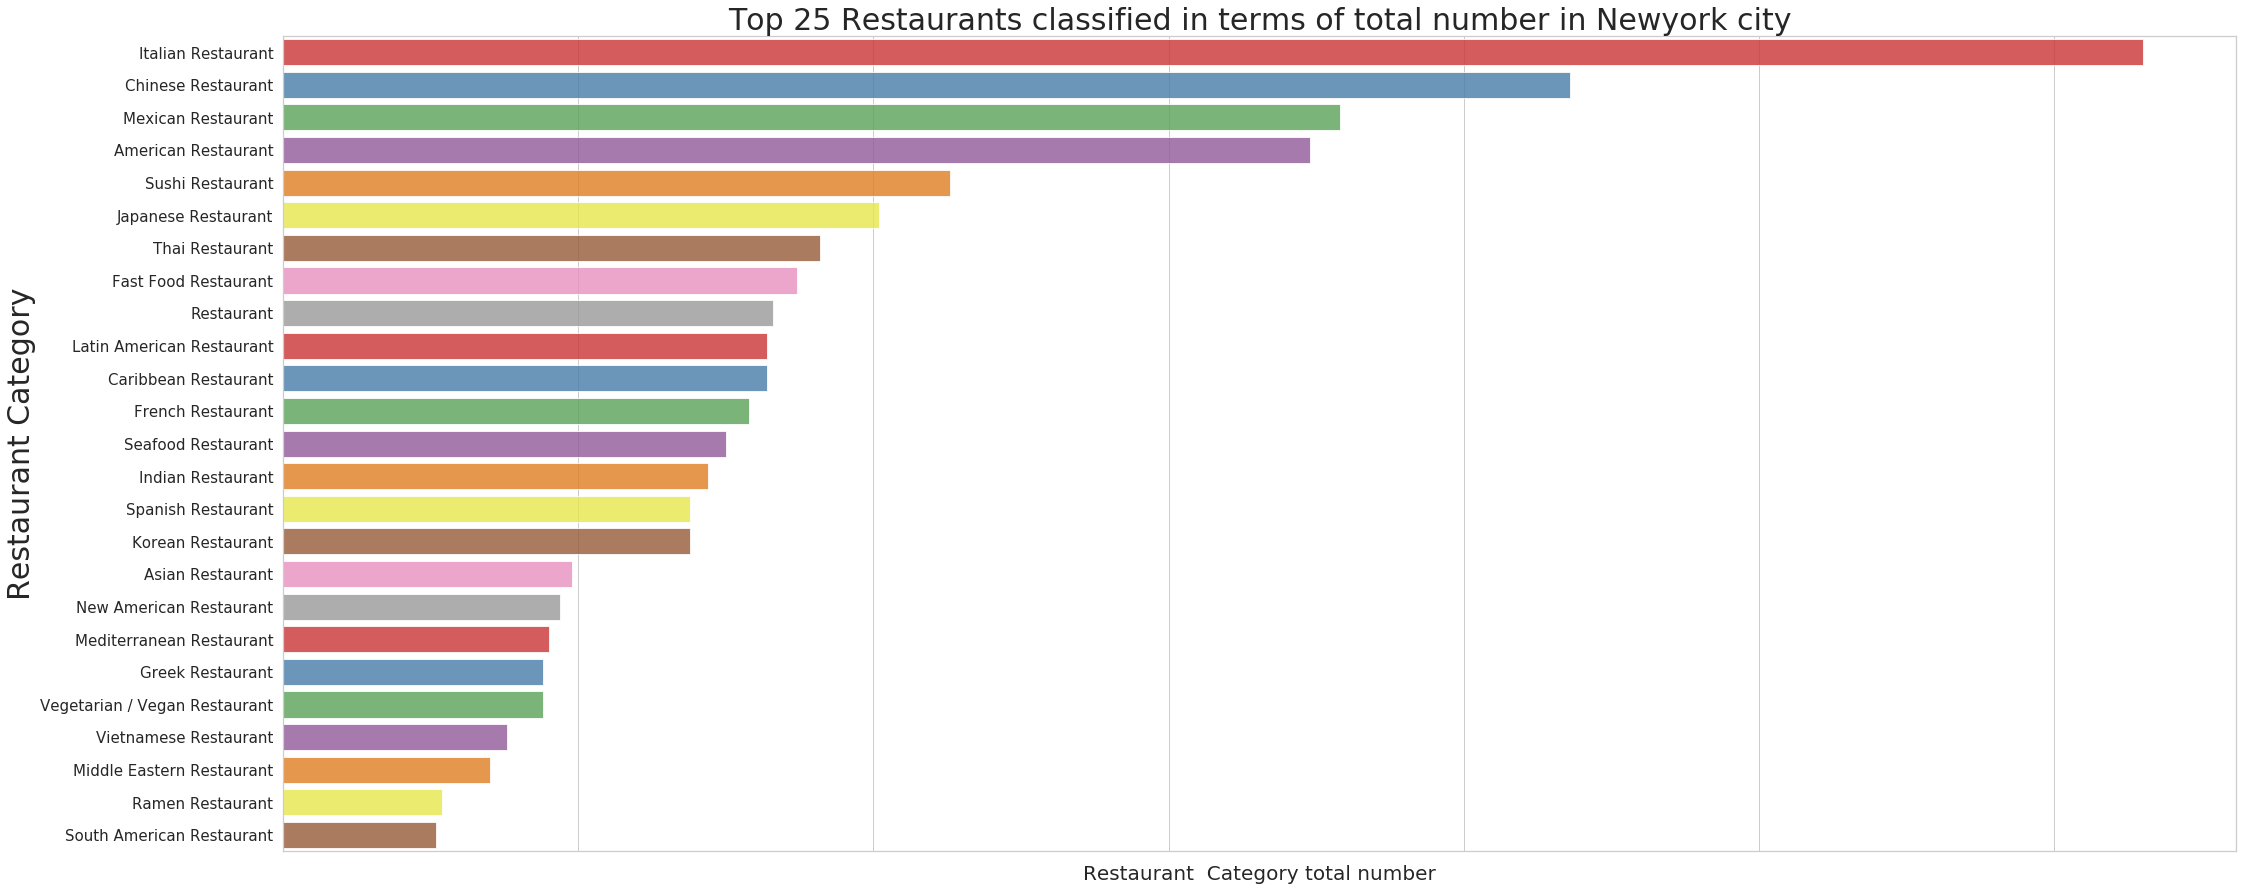

In [82]:
sns.set(style="whitegrid")
plt.figure(figsize=(35,15))
chart=sns.barplot(NC_top_25_restau["Restaurant type total number"],NC_top_25_restau["Restaurant type"].to_list(), alpha=0.8,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.axes.set_title('Top 25 Restaurants classified in terms of total number in Newyork city',fontsize=30)
chart.set_ylabel("Restaurant Category",fontsize=30)
chart.set_xlabel("Restaurant  Category total number",fontsize=20)
chart.tick_params(labelsize=15)
plt.show()

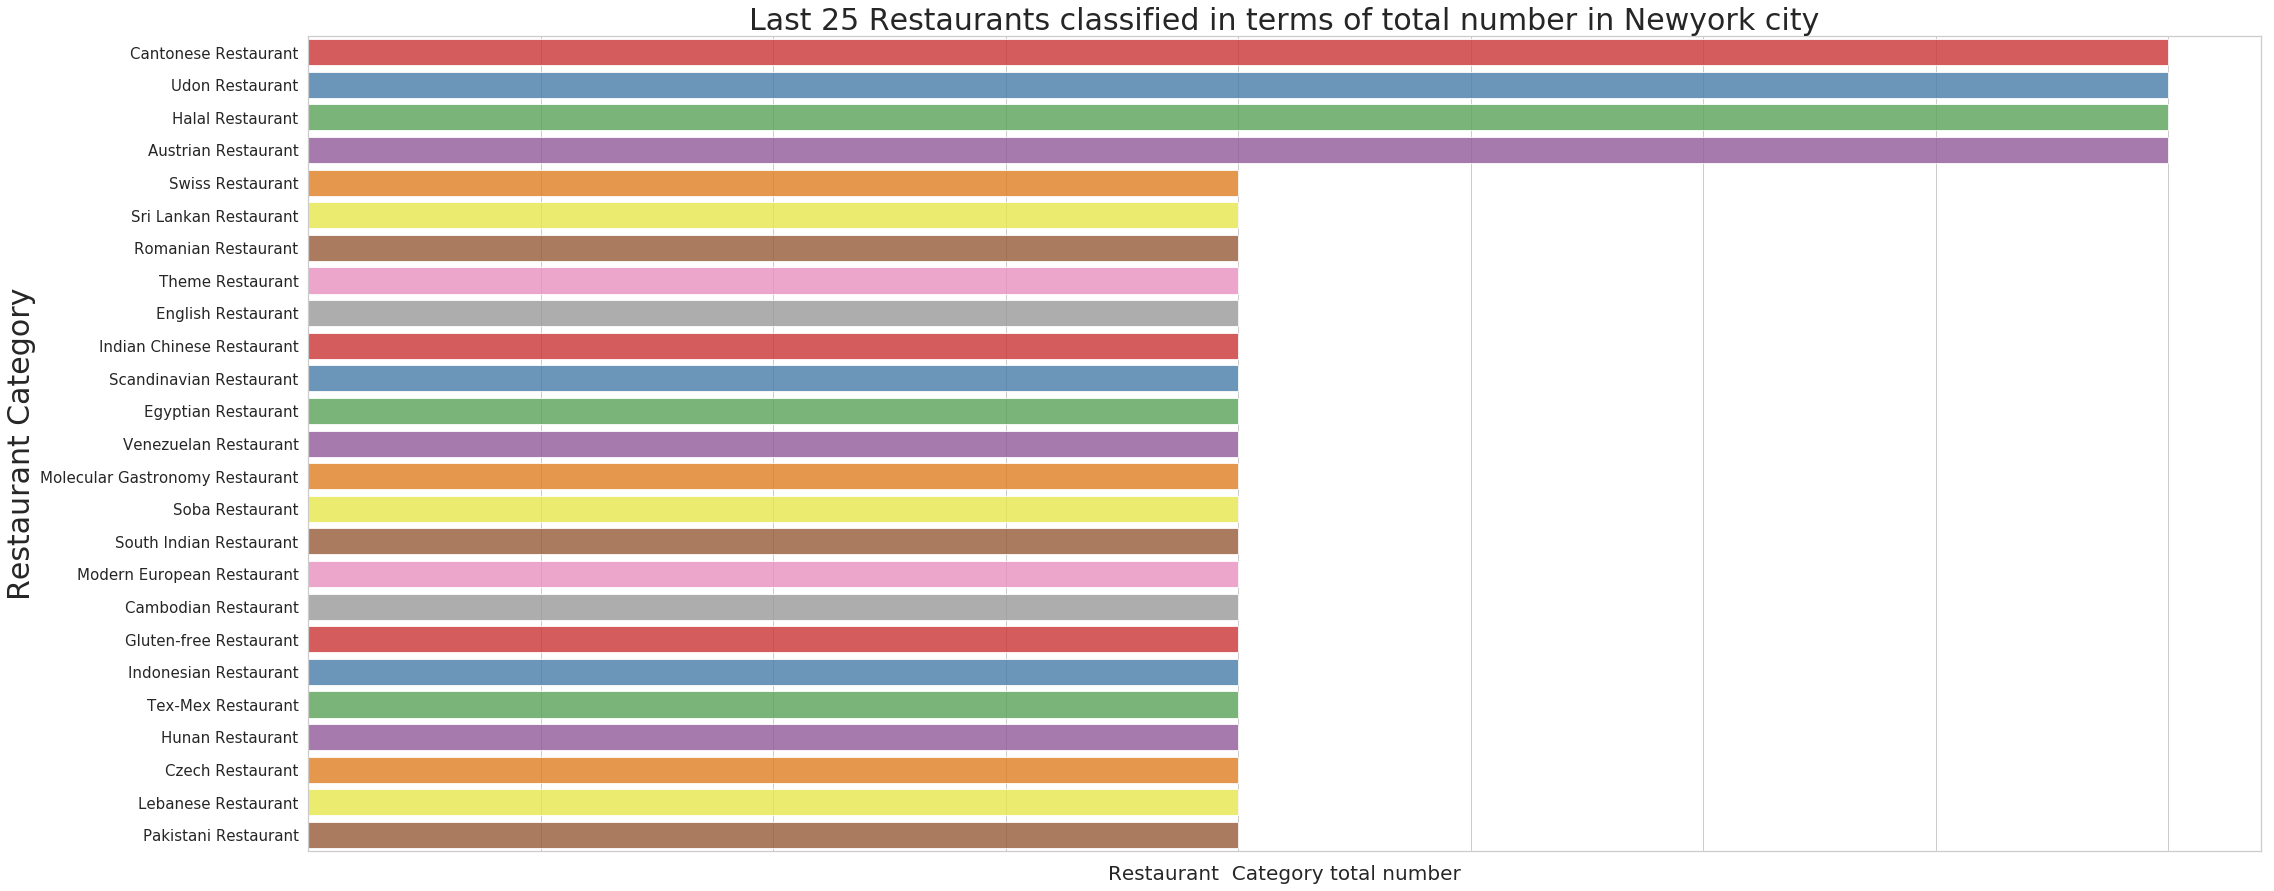

In [84]:
sn.set(style="whitegrid")
plt.figure(figsize=(35,15))
chart=sns.barplot(NC_last_25_restau["Restaurant type total number"],NC_last_25_restau["Restaurant type"].to_list(), alpha=0.8,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.axes.set_title('Last 25 Restaurants classified in terms of total number in Newyork city',fontsize=30)
chart.set_ylabel("Restaurant Category",fontsize=30)
chart.set_xlabel("Restaurant  Category total number",fontsize=20)
chart.tick_params(labelsize=15)
plt.show()

In [85]:
print('There are {} uniques categories in Newyork city '.format(len(NC_venues['Venue Category'].unique())))

There are 429 uniques categories in Newyork city 


In [86]:
NC_venues=NC_filtered

In [87]:
print('There are {} uniques restaurant categories in Newyork city '.format(len(NC_venues['Venue Category'].unique())))

There are 92 uniques restaurant categories in Newyork city 


In [88]:
NC_neihborhood_VenueCat = pd.crosstab(NC_venues['Neighborhood'],NC_venues['Venue Category'])

In [89]:
NC_neihborhood_VenueCat.head()

Venue Category  Afghan Restaurant  African Restaurant  American Restaurant  \
Neighborhood                                                                 
Allerton                        0                   0                    1   
Annadale                        0                   0                    0   
Arrochar                        0                   0                    0   
Arverne                         0                   0                    0   
Astoria                         0                   0                    1   

Venue Category  Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
Neighborhood                                                                 
Allerton                       0                       0                 0   
Annadale                       0                       0                 0   
Arrochar                       0                       0                 0   
Arverne                        0                       0                 0   
Astoria                        0                       0                 0   

Venue Category  Australian Restaurant  Austrian Restaurant  \
Neighborhood                                                 
Allerton                            0                    0   
Annadale                            0                    0   
Arrochar                            0                    0   
Arverne                             0                    0   
Astoria                             0                    0   

Venue Category  Brazilian Restaurant  Cajun / Creole Restaurant  \
Neighborhood                                                      
Allerton                           0                          0   
Annadale                           0                          0   
Arrochar                           0                          0   
Arverne                            0                          0   
Astoria                            1                          1   

Venue Category  Cambodian Restaurant  Cantonese Restaurant  \
Neighborhood                                                 
Allerton                           0                     0   
Annadale                           0                     0   
Arrochar                           0                     0   
Arverne                            0                     0   
Astoria                            0                     0   

Venue Category  Caribbean Restaurant  Caucasian Restaurant  \
Neighborhood                                                 
Allerton                           0                     0   
Annadale                           0                     0   
Arrochar                           0                     0   
Arverne                            0                     0   
Astoria                            0                     0   

Venue Category  Chinese Restaurant  Colombian Restaurant  \
Neighborhood                                               
Allerton                         2                     0   
Annadale                         0                     0   
Arrochar                         0                     0   
Arverne                          0                     0   
Astoria                          1                     0   

Venue Category  Comfort Food Restaurant  Cuban Restaurant  Czech Restaurant  \
Neighborhood                                                                  
Allerton                              0                 0                 0   
Annadale                              0                 0                 0   
Arrochar                              0                 0                 0   
Arverne                               0                 0                 0   
Astoria                               1                 0                 0   

Venue Category  Dim Sum Restaurant  Dumpling Restaurant  \
Neighborhood                                              
Allerton                         0    

In [90]:
# one hot encoding
NC_onehot = pd.get_dummies(NC_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NC_onehot['Neighborhood'] = NC_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NC_onehot.columns[-1]] + list(NC_onehot.columns[:-1])
print(fixed_columns)
NC_onehot = NC_onehot[fixed_columns]

NC_onehot.head()

['Neighborhood', 'Afghan Restaurant', 'African Restaurant', 'American Restaurant', 'Arepa Restaurant', 'Argentinian Restaurant', 'Asian Restaurant', 'Australian Restaurant', 'Austrian Restaurant', 'Brazilian Restaurant', 'Cajun / Creole Restaurant', 'Cambodian Restaurant', 'Cantonese Restaurant', 'Caribbean Restaurant', 'Caucasian Restaurant', 'Chinese Restaurant', 'Colombian Restaurant', 'Comfort Food Restaurant', 'Cuban Restaurant', 'Czech Restaurant', 'Dim Sum Restaurant', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Egyptian Restaurant', 'Empanada Restaurant', 'English Restaurant', 'Ethiopian Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'French Restaurant', 'German Restaurant', 'Gluten-free Restaurant', 'Greek Restaurant', 'Halal Restaurant', 'Hawaiian Restaurant', 'Himalayan Restaurant', 'Hotpot Restaurant', 'Hunan Restaurant', 'Indian Chinese Restaurant', 'Indian Restaurant', 'Indonesian Restaurant', 'Israeli Restaurant', 'Italian Re

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
5     Wakefield                  0                   0                    0   
14   Co-op City                  0                   0                    0   
16   Co-op City                  0                   0                    0   
28  Eastchester                  0                   0                    0   
30  Eastchester                  0                   0                    0   

    Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
5                  0                       0                 0   
14                 0                       0                 0   
16                 0                       0                 0   
28                 0                       0                 0   
30                 0                       0                 0   

    Australian Restaurant  Austrian Restaurant  Brazilian Restaurant  \
5                       0                    0                     0   
14                      0                    0                     0   
16                      0                    0                     0   
28                      0                    0                     0   
30                      0                    0                     0   

    Cajun / Creole Restaurant  Cambodian Restaurant  Cantonese Restaurant  \
5                           0                     0                     0   
14                          0                     0                     0   
16                          0                     0                     0   
28                          0                     0                     0   
30                          0                     0                     0   

    Caribbean Restaurant  Caucasian Restaurant  Chinese Restaurant  \
5                      1                     0                   0   
14                     0                     0                   0   
16                     0                     0                   0   
28                     1                     0                   0   
30                     0                     0                   0   

    Colombian Restaurant  Comfort Food Restaurant  Cuban Restaurant  \
5                      0                        0                 0   
14                     0                        0                 0   
16                     0                        0                 0   
28                     0                        0                 0   
30                     0                        0                 0   

    Czech Restaurant  Dim Sum Restaurant  Dumpling Restaurant  \
5                  0                   0                    0   
14                 0                   0                    0   
16                 0                   0                    0   
28                 0                   0                    0   
30                 0                   0                    0   

    Eastern European Restaurant  Egyptian Restaurant  Empanada Restaurant  \
5                             0                    0                    0   
14                            0                    0                    0   
16                            0                    0                    0   
28                            0                    0                    0   
30                            0                    0                    0   

    English Restaurant  Ethiopian Restaurant  Falafel Restaurant  \
5                    0                     0                   0   
14                   0                     0                   0   
16                   0                     0                   0   
28                   0                     0                   0   
30                   0                     0                   0   

    Fast Food Restaurant  Filipino Restaurant  French Restaurant  \
5                      0                    0           

In [91]:
NC_onehot.shape

(2580, 93)

In [92]:
NC_grouped = NC_onehot.groupby('Neighborhood').mean().reset_index()
NC_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0                     Allerton           0.000000            0.000000   
1                     Annadale           0.000000            0.000000   
2                     Arrochar           0.000000            0.000000   
3                      Arverne           0.000000            0.000000   
4                      Astoria           0.000000            0.000000   
5              Astoria Heights           0.000000            0.000000   
6                   Auburndale           0.000000            0.000000   
7                   Bath Beach           0.000000            0.000000   
8            Battery Park City           0.000000            0.000000   
9                    Bay Ridge           0.000000            0.000000   
10                 Bay Terrace           0.000000            0.000000   
11                  Baychester           0.000000            0.000000   
12                     Bayside           0.000000            0.000000   
13                Bedford Park           0.000000            0.000000   
14          Bedford Stuyvesant           0.000000            0.000000   
15                  Beechhurst           0.000000            0.000000   
16                    Bellaire           0.000000            0.000000   
17                Belle Harbor           0.000000            0.000000   
18                   Bellerose           0.000000            0.000000   
19                     Belmont           0.000000            0.000000   
20                 Bensonhurst           0.000000            0.000000   
21                  Blissville           0.000000            0.000000   
22                 Boerum Hill           0.000000            0.000000   
23                Borough Park           0.000000            0.000000   
24                   Briarwood           0.000000            0.000000   
25              Brighton Beach           0.000000            0.000000   
26           Broadway Junction           0.000000            0.000000   
27                   Bronxdale           0.000000            0.000000   
28            Brooklyn Heights           0.000000            0.000000   
29                 Brownsville           0.000000            0.000000   
30                  Bulls Head           0.000000            0.000000   
31                    Bushwick           0.000000            0.000000   
32             Cambria Heights           0.000000            0.000000   
33                    Canarsie           0.000000            0.000000   
34               Carnegie Hill           0.000000            0.000000   
35             Carroll Gardens           0.000000            0.000000   
36                 Castle Hill           0.000000            0.000000   
37           Castleton Corners           0.000000            0.000000   
38              Central Harlem           0.000000            0.142857   
39                  Charleston           0.000000            0.000000   
40                     Chelsea           0.000000            0.000000   
41                   Chinatown           0.000000            0.000000   
42                 City Island           0.000000            0.000000   
43                   City Line           0.000000            0.000000   
44                Civic Center           0.000000            0.000000   
45           Claremont Village           0.000000            0.000000   
46                Clason Point           0.000000            0.000000   
47                     Clifton           0.000000            0.000000   
48                     Clinton           0.000000            0.000000   
49                Clinton Hill           0.000000            0.000000   
50                  Co-op City           0.000000            0.000000   
51                 Cobble Hill           0.000000            0.000000   
52               College Point           0.000000            0.000000   
53                     Concord           0.000000            0.000000   
54 

In [94]:
NC_grouped.shape

(264, 93)

In [67]:
num_top_venues = 5

for hood in NC_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NC_grouped[NC_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                  venue  freq
0    Chinese Restaurant  0.33
1   American Restaurant  0.17
2  Fast Food Restaurant  0.17
3    Mexican Restaurant  0.17
4    Spanish Restaurant  0.17


----Annadale----
                     venue  freq
0               Restaurant   0.5
1         Sushi Restaurant   0.5
2        Afghan Restaurant   0.0
3  New American Restaurant   0.0
4      Romanian Restaurant   0.0


----Arrochar----
                       venue  freq
0         Italian Restaurant   0.4
1   Mediterranean Restaurant   0.2
2  Middle Eastern Restaurant   0.2
3          Polish Restaurant   0.2
4          Afghan Restaurant   0.0


----Arverne----
                 venue  freq
0      Thai Restaurant   1.0
1    Afghan Restaurant   0.0
2  Moroccan Restaurant   0.0
3  Romanian Restaurant   0.0
4           Restaurant   0.0


----Astoria----
                       venue  freq
0  Middle Eastern Restaurant  0.17
1           Greek Restaurant  0.14
2         Seafood Restaurant  0.11
3   Med

In [95]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [96]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NC_grouped['Neighborhood']

for ind in np.arange(NC_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NC_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood      1st Most Common Venue  2nd Most Common Venue  \
0     Allerton         Chinese Restaurant    American Restaurant   
1     Annadale                 Restaurant       Sushi Restaurant   
2     Arrochar         Italian Restaurant      Polish Restaurant   
3      Arverne            Thai Restaurant  Vietnamese Restaurant   
4      Astoria  Middle Eastern Restaurant       Greek Restaurant   

      3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
0      Fast Food Restaurant         Mexican Restaurant    Spanish Restaurant   
1     Vietnamese Restaurant        Egyptian Restaurant    English Restaurant   
2  Mediterranean Restaurant  Middle Eastern Restaurant      Greek Restaurant   
3          Halal Restaurant         English Restaurant  Ethiopian Restaurant   
4        Seafood Restaurant   Mediterranean Restaurant    Italian Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0  Vietnamese Restaurant      Greek Restaurant  Ethiopian Restaurant   
1   Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
2   Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
3     Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
4    Japanese Restaurant     Indian Restaurant      Sushi Restaurant   

  9th Most Common Venue   10th Most Common Venue  
0    Falafel Restaurant      Filipino Restaurant  
1   Filipino Restaurant        French Restaurant  
2   Filipino Restaurant        French Restaurant  
3     French Restaurant        German Restaurant  
4    Mexican Restaurant  Comfort Food Restaurant

In [97]:
NC_grouped_clustering = NC_grouped.drop('Neighborhood', 1)

In [98]:
Sum_of_squared_distances = []
NC_K = range(1,10)
for k in NC_K:
    km = KMeans(n_clusters=k)
    km = km.fit(NC_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
       

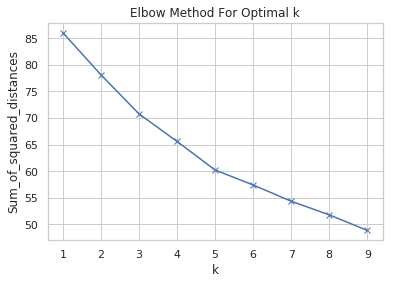

In [99]:
plt.plot(NC_K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [100]:
# In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5
NC_kclusters = 5

In [102]:

# run k-means clustering
kmeans = KMeans(n_clusters=NC_kclusters, random_state=0).fit(NC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 2, 1, 1, 2, 1, 1, 1, 1], dtype=int32)

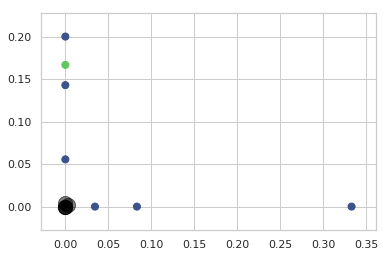

In [104]:
y_kmeans = kmeans.predict(NC_grouped_clustering)
plt.scatter(NC_grouped_clustering.iloc[:, 0],NC_grouped_clustering.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [105]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NC_merged = NC_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NC_merged =NC_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

NC_merged.dropna(inplace=True) # check the last columns!
NC_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0      Bronx    Wakefield  40.894705 -73.847201             0.0   
1      Bronx   Co-op City  40.874294 -73.829939             4.0   
2      Bronx  Eastchester  40.887556 -73.827806             0.0   
5      Bronx  Kingsbridge  40.881687 -73.902818             1.0   
6  Manhattan  Marble Hill  40.876551 -73.910660             1.0   

       1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
0       Caribbean Restaurant  Vietnamese Restaurant       Halal Restaurant   
1                 Restaurant   Fast Food Restaurant  Vietnamese Restaurant   
2       Caribbean Restaurant     Seafood Restaurant   Fast Food Restaurant   
5  Latin American Restaurant     Mexican Restaurant     Spanish Restaurant   
6         Seafood Restaurant    American Restaurant  Vietnamese Restaurant   

           4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0           Ethiopian Restaurant     Falafel Restaurant  Fast Food Restaurant   
1               Greek Restaurant     English Restaurant  Ethiopian Restaurant   
2             Chinese Restaurant  Vietnamese Restaurant   Empanada Restaurant   
5  Vegetarian / Vegan Restaurant     Seafood Restaurant  Fast Food Restaurant   
6               Greek Restaurant     English Restaurant  Ethiopian Restaurant   

  7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0   Filipino Restaurant     French Restaurant      German Restaurant   
1    Falafel Restaurant   Filipino Restaurant      French Restaurant   
2  Ethiopian Restaurant    Falafel Restaurant    Filipino Restaurant   
5    Chinese Restaurant  Caribbean Restaurant  Vietnamese Restaurant   
6    Falafel Restaurant  Fast Food Restaurant    Filipino Restaurant   

   10th Most Common Venue  
0  Gluten-free Restaurant  
1       German Restaurant  
2       French Restaurant  
5    Ethiopian Restaurant  
6       French Restaurant

In [106]:
# create map
NC_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(NC_kclusters)
ys = [i + x + (i*x)**2 for i in range(NC_kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
NC_merged=NC_merged.dropna(subset=['Cluster Labels'])
for lat, lon, poi, cluster in zip(NC_merged['Latitude'], NC_merged['Longitude'],NC_merged['Neighborhood'],NC_merged['Cluster Labels']):

    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(NC_map_clusters)
       
NC_map_clusters

In [95]:
NC_merged.loc[NC_merged['Cluster Labels'] == 0, NC_merged.columns[[1] + list(range(5, NC_merged.shape[1]))]]

Neighborhood          1st Most Common Venue  \
0            Wakefield           Caribbean Restaurant   
2          Eastchester           Caribbean Restaurant   
9       Williamsbridge           Caribbean Restaurant   
41           Olinville           Caribbean Restaurant   
75           Flatlands           Fast Food Restaurant   
78        Coney Island           Caribbean Restaurant   
164      South Jamaica  Vegetarian / Vegan Restaurant   
165         St. Albans           Caribbean Restaurant   
168    Cambria Heights           Caribbean Restaurant   
169           Rosedale             Chinese Restaurant   
188          Laurelton           Caribbean Restaurant   
218      Tompkinsville             Mexican Restaurant   
223              Rugby           Caribbean Restaurant   
259     Remsen Village           Caribbean Restaurant   
282  Broadway Junction           Caribbean Restaurant   
300            Erasmus           Caribbean Restaurant   

             2nd Most Common Venue  3rd Most Common Venue  \
0            Vietnamese Restaurant       Halal Restaurant   
2               Seafood Restaurant   Fast Food Restaurant   
9            Vietnamese Restaurant       Halal Restaurant   
41              Chinese Restaurant  Vietnamese Restaurant   
75            Caribbean Restaurant     Chinese Restaurant   
78   Vegetarian / Vegan Restaurant  Vietnamese Restaurant   
164           Caribbean Restaurant  Vietnamese Restaurant   
165           Fast Food Restaurant     Chinese Restaurant   
168             Chinese Restaurant  Vietnamese Restaurant   
169           Caribbean Restaurant  Vietnamese Restaurant   
188          Vietnamese Restaurant       Halal Restaurant   
218           Caribbean Restaurant  Vietnamese Restaurant   
223             Seafood Restaurant     Chinese Restaurant   
259           Fast Food Restaurant  Vietnamese Restaurant   
282          Vietnamese Restaurant       Halal Restaurant   
300          Vietnamese Restaurant       Halal Restaurant   

     4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0     Ethiopian Restaurant     Falafel Restaurant  Fast Food Restaurant   
2       Chinese Restaurant  Vietnamese Restaurant   Empanada Restaurant   
9     Ethiopian Restaurant     Falafel Restaurant  Fast Food Restaurant   
41     Empanada Restaurant   Ethiopian Restaurant    Falafel Restaurant   
75   Vietnamese Restaurant    Empanada Restaurant  Ethiopian Restaurant   
78        Greek Restaurant     English Restaurant  Ethiopian Restaurant   
164       Greek Restaurant     English Restaurant  Ethiopian Restaurant   
165  Vietnamese Restaurant    Empanada Restaurant  Ethiopian Restaurant   
168    Empanada Restaurant   Ethiopian Restaurant    Falafel Restaurant   
169    Empanada Restaurant   Ethiopian Restaurant    Falafel Restaurant   
188   Ethiopian Restaurant     Falafel Restaurant  Fast Food Restaurant   
218       Halal Restaurant   Ethiopian Restaurant    Falafel Restaurant   
223  Vietnamese Restaurant    Empanada Restaurant  Ethiopian Restaurant   
259       Halal Restaurant   Ethiopian Restaurant    Falafel Restaurant   
282   Ethiopian Restaurant     Falafel Restaurant  Fast Food Restaurant   
300   Ethiopian Restaurant     Falafel Restaurant  Fast Food Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0     Filipino Restaurant     French Restaurant     German Restaurant   
2    Ethiopian Restaurant    Falafel Restaurant   Filipino Restaurant   
9     Filipino Restaurant     French Restaurant     German Restaurant   
41   Fast Food Restaurant   Filipino Restaurant     French Restaurant   
75     Falafel Restaurant   Filipino Restaurant     French Restaurant   
78     Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
164    Falafel Restaurant  Fast Food Restaurant   Filipino Restaurant   
165    Falafel Restaurant   Filipino Restaurant     French Restaurant   
168  Fast Food Restaurant   Filipino Restaurant     French Restaurant

In [96]:
NC_merged.loc[NC_merged['Cluster Labels'] == 1,NC_merged.columns[[1] + list(range(5,NC_merged.shape[1]))]]

Neighborhood            1st Most Common Venue  \
5                  Kingsbridge        Latin American Restaurant   
6                  Marble Hill               Seafood Restaurant   
7                     Woodlawn              American Restaurant   
10                  Baychester             Fast Food Restaurant   
12                 City Island               Seafood Restaurant   
15              Morris Heights               Spanish Restaurant   
16                     Fordham             Fast Food Restaurant   
17                East Tremont             Fast Food Restaurant   
18                  West Farms        Latin American Restaurant   
20                     Melrose               Mexican Restaurant   
21                  Mott Haven               Spanish Restaurant   
22                 Port Morris        Latin American Restaurant   
24                 Hunts Point                       Restaurant   
25                  Morrisania             Fast Food Restaurant   
27                Clason Point        South American Restaurant   
28                 Throgs Neck              American Restaurant   
30                 Parkchester              American Restaurant   
31          Westchester Square             Fast Food Restaurant   
35              Spuyten Duyvil                  Thai Restaurant   
37                  Pelham Bay               Italian Restaurant   
38               Schuylerville               Mexican Restaurant   
40                 Castle Hill  Southern / Soul Food Restaurant   
42              Pelham Gardens               Italian Restaurant   
43                   Concourse               African Restaurant   
44                   Unionport        Latin American Restaurant   
46                   Bay Ridge               Italian Restaurant   
47                 Bensonhurst               Italian Restaurant   
48                 Sunset Park        Latin American Restaurant   
49                  Greenpoint                 Sushi Restaurant   
51              Brighton Beach               Russian Restaurant   
52              Sheepshead Bay               Turkish Restaurant   
53           Manhattan Terrace              Japanese Restaurant   
57                  Kensington                  Thai Restaurant   
58             Windsor Terrace               Italian Restaurant   
59            Prospect Heights               Mexican Restaurant   
61                Williamsburg                       Restaurant   
62                    Bushwick               Mexican Restaurant   
63          Bedford Stuyvesant          New American Restaurant   
64            Brooklyn Heights               Italian Restaurant   
65                 Cobble Hill               Italian Restaurant   
67                    Red Hook               Seafood Restaurant   
68                     Gowanus               Italian Restaurant   
69                 Fort Greene               Italian Restaurant   
70                  Park Slope               Italian Restaurant   
71               Cypress Hills             Fast Food Restaurant   
79                  Bath Beach               Chinese Restaurant   
80                Borough Park                       Restaurant   
82             Gerritsen Beach               Seafood Restaurant   
84                Clinton Hill               Italian Restaurant   
86                    Downtown                French Restaurant   
87                 Boerum Hill                French Restaurant   
88   Prospect Lefferts Gardens             Caribbean Restaurant   
90                   City Line             Fast Food Restaurant   
93         Prospect Park South             Caribbean Restaurant   
94                  Georgetown              Japanese Restaurant   
95           East Williamsburg               Mexican Restaurant   
96                  North Side              American Restaurant   
97                  South Side              American Restaurant   
98               Ocean Parkway                Jewish Restaurant  

In [97]:
NC_merged.loc[NC_merged['Cluster Labels'] == 2,NC_merged.columns[[1] + list(range(5,NC_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
11     Pelham Parkway    Italian Restaurant        Thai Restaurant   
29       Country Club    Italian Restaurant  Vietnamese Restaurant   
33        Morris Park    Italian Restaurant       Arepa Restaurant   
34            Belmont    Italian Restaurant     Mexican Restaurant   
36    North Riverdale    Italian Restaurant       Sushi Restaurant   
39     Edgewater Park    Italian Restaurant    American Restaurant   
66    Carroll Gardens    Italian Restaurant      French Restaurant   
197        St. George    Italian Restaurant    American Restaurant   
206  Mariner's Harbor    Italian Restaurant  Vietnamese Restaurant   
213       Great Kills    Italian Restaurant    Japanese Restaurant   
217       Tottenville    Italian Restaurant     Mexican Restaurant   
228          Arrochar    Italian Restaurant      Polish Restaurant   
230          Old Town    Italian Restaurant    American Restaurant   
231      Dongan Hills    Italian Restaurant       Sushi Restaurant   
234    New Dorp Beach    Italian Restaurant             Restaurant   
236          Huguenot    Italian Restaurant  Vietnamese Restaurant   
251     Richmond Town    Italian Restaurant  Vietnamese Restaurant   
252       Shore Acres    Italian Restaurant             Restaurant   
258          Elm Park    Italian Restaurant    American Restaurant   
266   Astoria Heights    Italian Restaurant  Vietnamese Restaurant   
287       Egbertville    Italian Restaurant  Vietnamese Restaurant   
292   Lighthouse Hill    Italian Restaurant  Vietnamese Restaurant   
296           Madison    Italian Restaurant             Restaurant   

           3rd Most Common Venue      4th Most Common Venue  \
11            Chinese Restaurant           Sushi Restaurant   
29              Halal Restaurant         English Restaurant   
33         Vietnamese Restaurant           Halal Restaurant   
34   Eastern European Restaurant        American Restaurant   
36            Mexican Restaurant         Chinese Restaurant   
39              Asian Restaurant       Fast Food Restaurant   
66               Thai Restaurant                 Restaurant   
197              Thai Restaurant           Tapas Restaurant   
206             Halal Restaurant         English Restaurant   
213           Chinese Restaurant         Spanish Restaurant   
217        Vietnamese Restaurant           Greek Restaurant   
228     Mediterranean Restaurant  Middle Eastern Restaurant   
230                   Restaurant      Vietnamese Restaurant   
231         Fast Food Restaurant         Chinese Restaurant   
234        Vietnamese Restaurant           Greek Restaurant   
236             Halal Restaurant         English Restaurant   
251             Halal Restaurant         English Restaurant   
252           Chinese Restaurant      Vietnamese Restaurant   
258           Chinese Restaurant      Vietnamese Restaurant   
266             Halal Restaurant         English Restaurant   
287             Halal Restaurant         English Restaurant   
292             Halal Restaurant         English Restaurant   
296        Vietnamese Restaurant           Greek Restaurant   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
11    Vietnamese Restaurant      Greek Restaurant    English Restaurant   
29     Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
33     Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
34      Japanese Restaurant  Fast Food Restaurant    Spanish Restaurant   
36    Vietnamese Restaurant  Ethiopian Restaurant    Falafel Restaurant   
39    Vietnamese Restaurant      Halal Restaurant  Ethiopian Restaurant   
66      Dumpling Restaurant      Cuban Restaurant   Filipino Restaurant   
197   Vietnamese Restaurant      Greek Restaurant    English Restaurant   
206    Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
213  Gluten-free Restaurant    English Restaurant  Ethiopian Rest

In [98]:
NC_merged.loc[NC_merged['Cluster Labels'] == 3,NC_merged.columns[[1] + list(range(5,NC_merged.shape[1]))]]

Neighborhood            1st Most Common Venue  \
8                Norwood               Chinese Restaurant   
13          Bedford Park               Chinese Restaurant   
14    University Heights             Fast Food Restaurant   
19          High  Bridge        Latin American Restaurant   
23              Longwood        Latin American Restaurant   
26             Soundview               Chinese Restaurant   
32              Van Nest             Caribbean Restaurant   
50             Gravesend               Italian Restaurant   
54              Flatbush             Caribbean Restaurant   
56         East Flatbush             Fast Food Restaurant   
60           Brownsville                       Restaurant   
72         East New York             Caribbean Restaurant   
73         Starrett City             Caribbean Restaurant   
74              Canarsie             Caribbean Restaurant   
83           Marine Park               Chinese Restaurant   
89            Ocean Hill  Southern / Soul Food Restaurant   
136          Kew Gardens               Chinese Restaurant   
142              Maspeth               Chinese Restaurant   
154           Douglaston               Italian Restaurant   
156            Bellerose               Italian Restaurant   
158        Fresh Meadows               Chinese Restaurant   
161      Oakland Gardens                Korean Restaurant   
163               Hollis             Fast Food Restaurant   
166             Rochdale  Southern / Soul Food Restaurant   
167  Springfield Gardens             Fast Food Restaurant   
170         Far Rockaway               Chinese Restaurant   
174           Beechhurst               Chinese Restaurant   
184      Queensboro Hill               Chinese Restaurant   
190         Belle Harbor               Italian Restaurant   
194             Bellaire               Chinese Restaurant   
209      New Springville               Chinese Restaurant   
232        Midland Beach                       Restaurant   
240            Rossville              American Restaurant   
260             New Lots               Chinese Restaurant   
267    Claremont Village               Chinese Restaurant   
270           Mount Hope               Chinese Restaurant   
281           Weeksville               Chinese Restaurant   
284        Manor Heights              American Restaurant   
285          Willowbrook               Chinese Restaurant   
291         Prince's Bay                 Sushi Restaurant   
298             Allerton               Chinese Restaurant   

             2nd Most Common Venue        3rd Most Common Venue  \
8               Spanish Restaurant          American Restaurant   
13              Mexican Restaurant           Spanish Restaurant   
14              Chinese Restaurant           African Restaurant   
19              Chinese Restaurant             Asian Restaurant   
23            Fast Food Restaurant           Chinese Restaurant   
26       Latin American Restaurant        Vietnamese Restaurant   
32       Middle Eastern Restaurant           Chinese Restaurant   
50              Chinese Restaurant  Eastern European Restaurant   
54              Mexican Restaurant           Chinese Restaurant   
56              Chinese Restaurant         Caribbean Restaurant   
60              Chinese Restaurant           Spanish Restaurant   
72            Fast Food Restaurant             Asian Restaurant   
73             American Restaurant           Chinese Restaurant   
74                Asian Restaurant           Chinese Restaurant   
83           Vietnamese Restaurant             Halal Restaurant   
89              Mexican Restaurant           Chinese Restaurant   
136              Indian Restaurant           Italian Restaurant   
142               Sushi Restaurant           Italian Restaurant   
154           Fast Food Restaurant    Cajun / Creole Restaurant   
156             Chinese Restaurant          American Restaurant   
158  Vegetarian / Vegan Restaurant        

In [99]:
NC_merged.loc[NC_merged['Cluster Labels'] == 4,NC_merged.columns[[1] + list(range(5,NC_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
1          Co-op City            Restaurant   Fast Food Restaurant   
148  South Ozone Park  Fast Food Restaurant  Vietnamese Restaurant   
185         Hillcrest    Dim Sum Restaurant   Fast Food Restaurant   
222           Wingate  Fast Food Restaurant  Vietnamese Restaurant   
237   Pleasant Plains  Fast Food Restaurant  Vietnamese Restaurant   
288           Roxbury  Fast Food Restaurant  Vietnamese Restaurant   
302           Hammels  Fast Food Restaurant  Vietnamese Restaurant   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1    Vietnamese Restaurant      Greek Restaurant    English Restaurant   
148       Halal Restaurant    English Restaurant  Ethiopian Restaurant   
185  Vietnamese Restaurant      Halal Restaurant  Ethiopian Restaurant   
222       Halal Restaurant    English Restaurant  Ethiopian Restaurant   
237       Halal Restaurant    English Restaurant  Ethiopian Restaurant   
288       Halal Restaurant    English Restaurant  Ethiopian Restaurant   
302       Halal Restaurant    English Restaurant  Ethiopian Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1    Ethiopian Restaurant    Falafel Restaurant   Filipino Restaurant   
148    Falafel Restaurant   Filipino Restaurant     French Restaurant   
185    Falafel Restaurant   Filipino Restaurant     French Restaurant   
222    Falafel Restaurant   Filipino Restaurant     French Restaurant   
237    Falafel Restaurant   Filipino Restaurant     French Restaurant   
288    Falafel Restaurant   Filipino Restaurant     French Restaurant   
302    Falafel Restaurant   Filipino Restaurant     French Restaurant   

    9th Most Common Venue  10th Most Common Venue  
1       French Restaurant       German Restaurant  
148     German Restaurant  Gluten-free Restaurant  
185     German Restaurant  Gluten-free Restaurant  
222     German Restaurant  Gluten-free Restaurant  
237     German Restaurant  Gluten-free Restaurant  
288     German Restaurant  Gluten-free Restaurant  
302     German Restaurant  Gluten-free Restaurant

# II- Toronto neighbourhoods Data analisys

In [100]:
! pip install requests

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

In [102]:
import requests

## Let scrap the wikipedia data using the ling provided

In [106]:
Donnees=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
Donnees

[    Postcode           Borough  \
 0        M1A      Not assigned   
 1        M2A      Not assigned   
 2        M3A        North York   
 3        M4A        North York   
 4        M5A  Downtown Toronto   
 5        M6A        North York   
 6        M6A        North York   
 7        M7A  Downtown Toronto   
 8        M8A      Not assigned   
 9        M9A      Queen's Park   
 10       M1B       Scarborough   
 11       M1B       Scarborough   
 12       M2B      Not assigned   
 13       M3B        North York   
 14       M4B         East York   
 15       M4B         East York   
 16       M5B  Downtown Toronto   
 17       M5B  Downtown Toronto   
 18       M6B        North York   
 19       M7B      Not assigned   
 20       M8B      Not assigned   
 21       M9B         Etobicoke   
 22       M9B         Etobicoke   
 23       M9B         Etobicoke   
 24       M9B         Etobicoke   
 25       M9B         Etobicoke   
 26       M1C       Scarborough   
 27       M1C       

In [107]:
Donnees=Donnees[0]
Donnees.head()

Postcode           Borough     Neighbourhood
0      M1A      Not assigned      Not assigned
1      M2A      Not assigned      Not assigned
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront

In [109]:
Donnees=Donnees[Donnees['Borough']!='Not assigned']
Donnees.head()

Postcode           Borough     Neighbourhood
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront
5      M6A        North York  Lawrence Heights
6      M6A        North York    Lawrence Manor

In [110]:
Donnees[Donnees["Neighbourhood"]=='Not assigned']["Neighbourhood"]=Donnees[Donnees["Neighbourhood"]=='Not assigned']["Borough"]
Donnees.head()
Donnees.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(210, 3)

In [111]:
Donnees=Donnees.groupby(['Postcode','Borough'])['Neighbourhood'].apply(','.join).reset_index()
Donnees.head()

Postcode      Borough                         Neighbourhood
0      M1B  Scarborough                         Rouge,Malvern
1      M1C  Scarborough  Highland Creek,Rouge Hill,Port Union
2      M1E  Scarborough       Guildwood,Morningside,West Hill
3      M1G  Scarborough                                Woburn
4      M1H  Scarborough                             Cedarbrae

In [112]:
Donnees.shape

(103, 3)

# As data has been processed and cleaned,let add latitude and longitude colums


In [113]:
! pip install geocoder

     |████████████████████████████████| 102kB 21.9MB/s ta 0:00:01


# Being difficult to acces to coordinates unsing geocoder ,we will use the Geospacial_data and use pandas to load


In [114]:
!wget -q -O 'Geospatial_data.csv'  http://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [115]:
Geospatial_df = pd.read_csv('Geospatial_data.csv')
Geospatial_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [116]:
# define the dataframe columns
column_names = ['Postcode','Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

import geocoder # import geocoder

for index, row in Donnees.iterrows():
    latitude = Geospatial_df[Geospatial_df["Postal Code"]==row['Postcode']]['Latitude'].values[0]
    longitude = Geospatial_df[Geospatial_df["Postal Code"]==row['Postcode']]['Longitude'].values[0]
    neighborhoods = neighborhoods.append({'Postcode':row['Postcode'],'Borough': row['Borough'],
                                          'Neighborhood': row['Neighbourhood'],
                                          'Latitude': latitude,
                                          'Longitude': longitude}, ignore_index=True)
neighborhoods.head(10)


Postcode      Borough                                   Neighborhood  \
0      M1B  Scarborough                                  Rouge,Malvern   
1      M1C  Scarborough           Highland Creek,Rouge Hill,Port Union   
2      M1E  Scarborough                Guildwood,Morningside,West Hill   
3      M1G  Scarborough                                         Woburn   
4      M1H  Scarborough                                      Cedarbrae   
5      M1J  Scarborough                            Scarborough Village   
6      M1K  Scarborough      East Birchmount Park,Ionview,Kennedy Park   
7      M1L  Scarborough                  Clairlea,Golden Mile,Oakridge   
8      M1M  Scarborough  Cliffcrest,Cliffside,Scarborough Village West   
9      M1N  Scarborough                     Birch Cliff,Cliffside West   

    Latitude  Longitude  
0  43.806686 -79.194353  
1  43.784535 -79.160497  
2  43.763573 -79.188711  
3  43.770992 -79.216917  
4  43.773136 -79.239476  
5  43.744734 -79.239476  
6  43.727929 -79.262029  
7  43.711112 -79.284577  
8  43.716316 -79.239476  
9  43.692657 -79.264848

# Now is the Clustering part

# Use geopy library to get the latitude and longitude values of Toronto.

In [117]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 43.653963, -79.387207.


# Create a map of Toronto with neighborhoods superimposed on top.

In [118]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
map_Toronto

#  Let's explore the first neighborhoods in our dataframe

In [119]:
neighborhoods.loc[0, 'Neighborhood']

'Rouge,Malvern'

In [120]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude =neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name =neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge,Malvern are 43.806686299999996, -79.19435340000001.


# Now, let's get the top 100 venues that are in Rouge, Toronto,Malvern, Toronto within a radius of 500 meters.

In [121]:
# type your answer here
LIMIT = 100
radius = 500
urlT = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
urlT

'https://api.foursquare.com/v2/venues/explore?&client_id=BF3KRSJVJ00WI2KN5ODMGWHPFKO5JEXD1XJV0TUEOH42TPRK&client_secret=QD31EF0JNJHJCX0FH4UOMEJDSWQ4AK5IDFP1PATDKGJGSK4W&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [122]:
resultsT = requests.get(urlT).json()
resultsT

{'meta': {'code': 200, 'requestId': '5e3ed57478a484001cf116a3'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': "Wendy's",
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

**Now we are ready to clean the json and structure it into a pandas dataframe**

In [123]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name      categories        lat        lng
0  Lollipops Gelato    Dessert Shop  40.894123 -73.845892
1          Rite Aid        Pharmacy  40.896649 -73.844846
2  Carvel Ice Cream  Ice Cream Shop  40.890487 -73.848568
3           Dunkin'      Donut Shop  40.890459 -73.849089
4             Shell     Gas Station  40.894187 -73.845862

In [124]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


# Let explore the Neighborhoods in Toronto

**Let's create a function to repeat the same process to all the neighborhoods in Toronto**

In [125]:
# type your answer here
Toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'])

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beaches West,Indi

# Let's check the size of the resulting dataframe

In [126]:
print(Toronto_venues.shape)
Toronto_venues.head()

(2213, 7)


Neighborhood  Neighborhood Latitude  \
0                         Rouge,Malvern              43.806686   
1                         Rouge,Malvern              43.806686   
2  Highland Creek,Rouge Hill,Port Union              43.784535   
3  Highland Creek,Rouge Hill,Port Union              43.784535   
4  Highland Creek,Rouge Hill,Port Union              43.784535   

   Neighborhood Longitude                      Venue  Venue Latitude  \
0              -79.194353                    Wendy's       43.807448   
1              -79.194353      Interprovincial Group       43.805630   
2              -79.160497     Chris Effects Painting       43.784343   
3              -79.160497      Royal Canadian Legion       43.782533   
4              -79.160497  Affordable Toronto Movers       43.787919   

   Venue Longitude              Venue Category  
0       -79.199056        Fast Food Restaurant  
1       -79.200378                  Print Shop  
2       -79.163742  Construction & Landscaping  
3       -79.163085                         Bar  
4       -79.162977               Moving Target

In [127]:
print('There are {} uniques categories in Toronto.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 266 uniques categories in Toronto.


In [128]:
#retrive all restaurant from Toronto data set
Toronto_restaut=restaurantList(Toronto_venues["Venue Category"].to_numpy())


In [129]:
#total  number of restaurant 
len(Toronto_restaut)

503

In [130]:
Toronto_UniqueRestaurant=set(Toronto_restaut)
Toronto_UniqueRestaurant


{'Afghan Restaurant',
 'American Restaurant',
 'Asian Restaurant',
 'Belgian Restaurant',
 'Brazilian Restaurant',
 'Cajun / Creole Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Dim Sum Restaurant',
 'Doner Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Empanada Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Hakka Restaurant',
 'Indian Restaurant',
 'Indonesian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Latin American Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Modern European Restaurant',
 'Molecular Gastronomy Restaurant',
 'New American Restaurant',
 'Portuguese Restaurant',
 'Ramen Restaurant',
 'Restaurant',
 'Seafood Res

In [131]:
len(Toronto_UniqueRestaurant)

48

In [132]:
#let filter the data set containing ongly  restauraant
Toronto_mask = Toronto_venues["Venue Category"].isin(Toronto_UniqueRestaurant)
Toronto_filtered=Toronto_venues[Toronto_mask]

In [133]:
Toronto_filtered.head()

Neighborhood  Neighborhood Latitude  \
0                     Rouge,Malvern              43.806686   
7   Guildwood,Morningside,West Hill              43.763573   
14                           Woburn              43.770992   
15                        Cedarbrae              43.773136   
16                        Cedarbrae              43.773136   

    Neighborhood Longitude                     Venue  Venue Latitude  \
0               -79.194353                   Wendy's       43.807448   
7               -79.188711          Big Bite Burrito       43.766299   
14              -79.216917        Korean Grill House       43.770812   
15              -79.239476       Federick Restaurant       43.774697   
16              -79.239476  Drupati's Roti & Doubles       43.775222   

    Venue Longitude        Venue Category  
0        -79.199056  Fast Food Restaurant  
7        -79.190720    Mexican Restaurant  
14       -79.214502     Korean Restaurant  
15       -79.241142      Hakka Restaurant  
16       -79.241678  Caribbean Restaurant

In [134]:
Toronto_series = pd.DataFrame(Toronto_filtered["Venue Category"].value_counts())
Toronto_series.rename(columns={"Venue Category":"Restaurant type total number"},inplace=True)
Toronto_series["Restaurant type"]=Toronto_series.index
#change the restaurant type position
Tinchange=[Toronto_series.columns.to_list()[-1],Toronto_series.columns.to_list()[0]]
Toronto_series=Toronto_series[Tinchange]
Toronto_series.head()

Restaurant type  Restaurant type total number
Restaurant                      Restaurant                            64
Italian Restaurant      Italian Restaurant                            48
Japanese Restaurant    Japanese Restaurant                            37
Fast Food Restaurant  Fast Food Restaurant                            30
American Restaurant    American Restaurant                            26

In [135]:
Toronto_series.shape

(48, 2)

In [136]:
#the 50 1st restaurant in termes of number of restaurant
Toronto_top_50_restau=Toronto_series.head(50)

#the 50 last restaurant in termes of number of restaurant
Toronto_last_50_restau=Toronto_series.tail(50)

In [138]:
Toronto_top_50_restau

Restaurant type  \
Restaurant                                            Restaurant   
Italian Restaurant                            Italian Restaurant   
Japanese Restaurant                          Japanese Restaurant   
Fast Food Restaurant                        Fast Food Restaurant   
American Restaurant                          American Restaurant   
Seafood Restaurant                            Seafood Restaurant   
Sushi Restaurant                                Sushi Restaurant   
Thai Restaurant                                  Thai Restaurant   
Chinese Restaurant                            Chinese Restaurant   
Vegetarian / Vegan Restaurant      Vegetarian / Vegan Restaurant   
Asian Restaurant                                Asian Restaurant   
Greek Restaurant                                Greek Restaurant   
Mexican Restaurant                            Mexican Restaurant   
Indian Restaurant                              Indian Restaurant   
Middle Eastern Restaurant              Middle Eastern Restaurant   
Vietnamese Restaurant                      Vietnamese Restaurant   
French Restaurant                              French Restaurant   
Ramen Restaurant                                Ramen Restaurant   
Caribbean Restaurant                        Caribbean Restaurant   
New American Restaurant                  New American Restaurant   
Comfort Food Restaurant                  Comfort Food Restaurant   
Latin American Restaurant              Latin American Restaurant   
Mediterranean Restaurant                Mediterranean Restaurant   
Portuguese Restaurant                      Portuguese Restaurant   
Dumpling Restaurant                          Dumpling Restaurant   
Eastern European Restaurant          Eastern European Restaurant   
Gluten-free Restaurant                    Gluten-free Restaurant   
Korean Restaurant                              Korean Restaurant   
Falafel Restaurant                            Falafel Restaurant   
Ethiopian Restaurant                        Ethiopian Restaurant   
Cuban Restaurant                                Cuban Restaurant   
Brazilian Restaurant                        Brazilian Restaurant   
Colombian Restaurant                        Colombian Restaurant   
Modern European Restaurant            Modern European Restaurant   
Dim Sum Restaurant                            Dim Sum Restaurant   
Hakka Restaurant                                Hakka Restaurant   
Filipino Restaurant                          Filipino Restaurant   
German Restaurant                              German Restaurant   
Doner Restaurant                                Doner Restaurant   
Indonesian Restaurant                      Indonesian Restaurant   
Cajun / Creole Restaurant              Cajun / Creole Restaurant   
Afghan Restaurant                              Afghan Restaurant   
Southern / Soul Food Restaurant  Southern / Soul Food Restaurant   
Belgian Restaurant                            Belgian Restaurant   
Molecular Gastronomy Restaurant  Molecular Gastronomy Restaurant   
Theme Restaurant                                Theme Restaurant   
Taiwanese Restaurant                        Taiwanese Restaurant   
Empanada Restaurant                          Empanada Restaurant   

                                 Restaurant type total number  
Restaurant                                                 64  
Italian Restaurant                                         48  
Japanese Restaurant                                        37  
Fast Food Restaurant                                       30  
American Restaurant                                        26  
Seafood Restaurant                                         25  
Sushi Restaurant                                           25  
Thai Restaurant                                            23  
Chinese Restaurant                                         23  
Vegetarian / Vegan Restaurant                              18  
Asian Restau

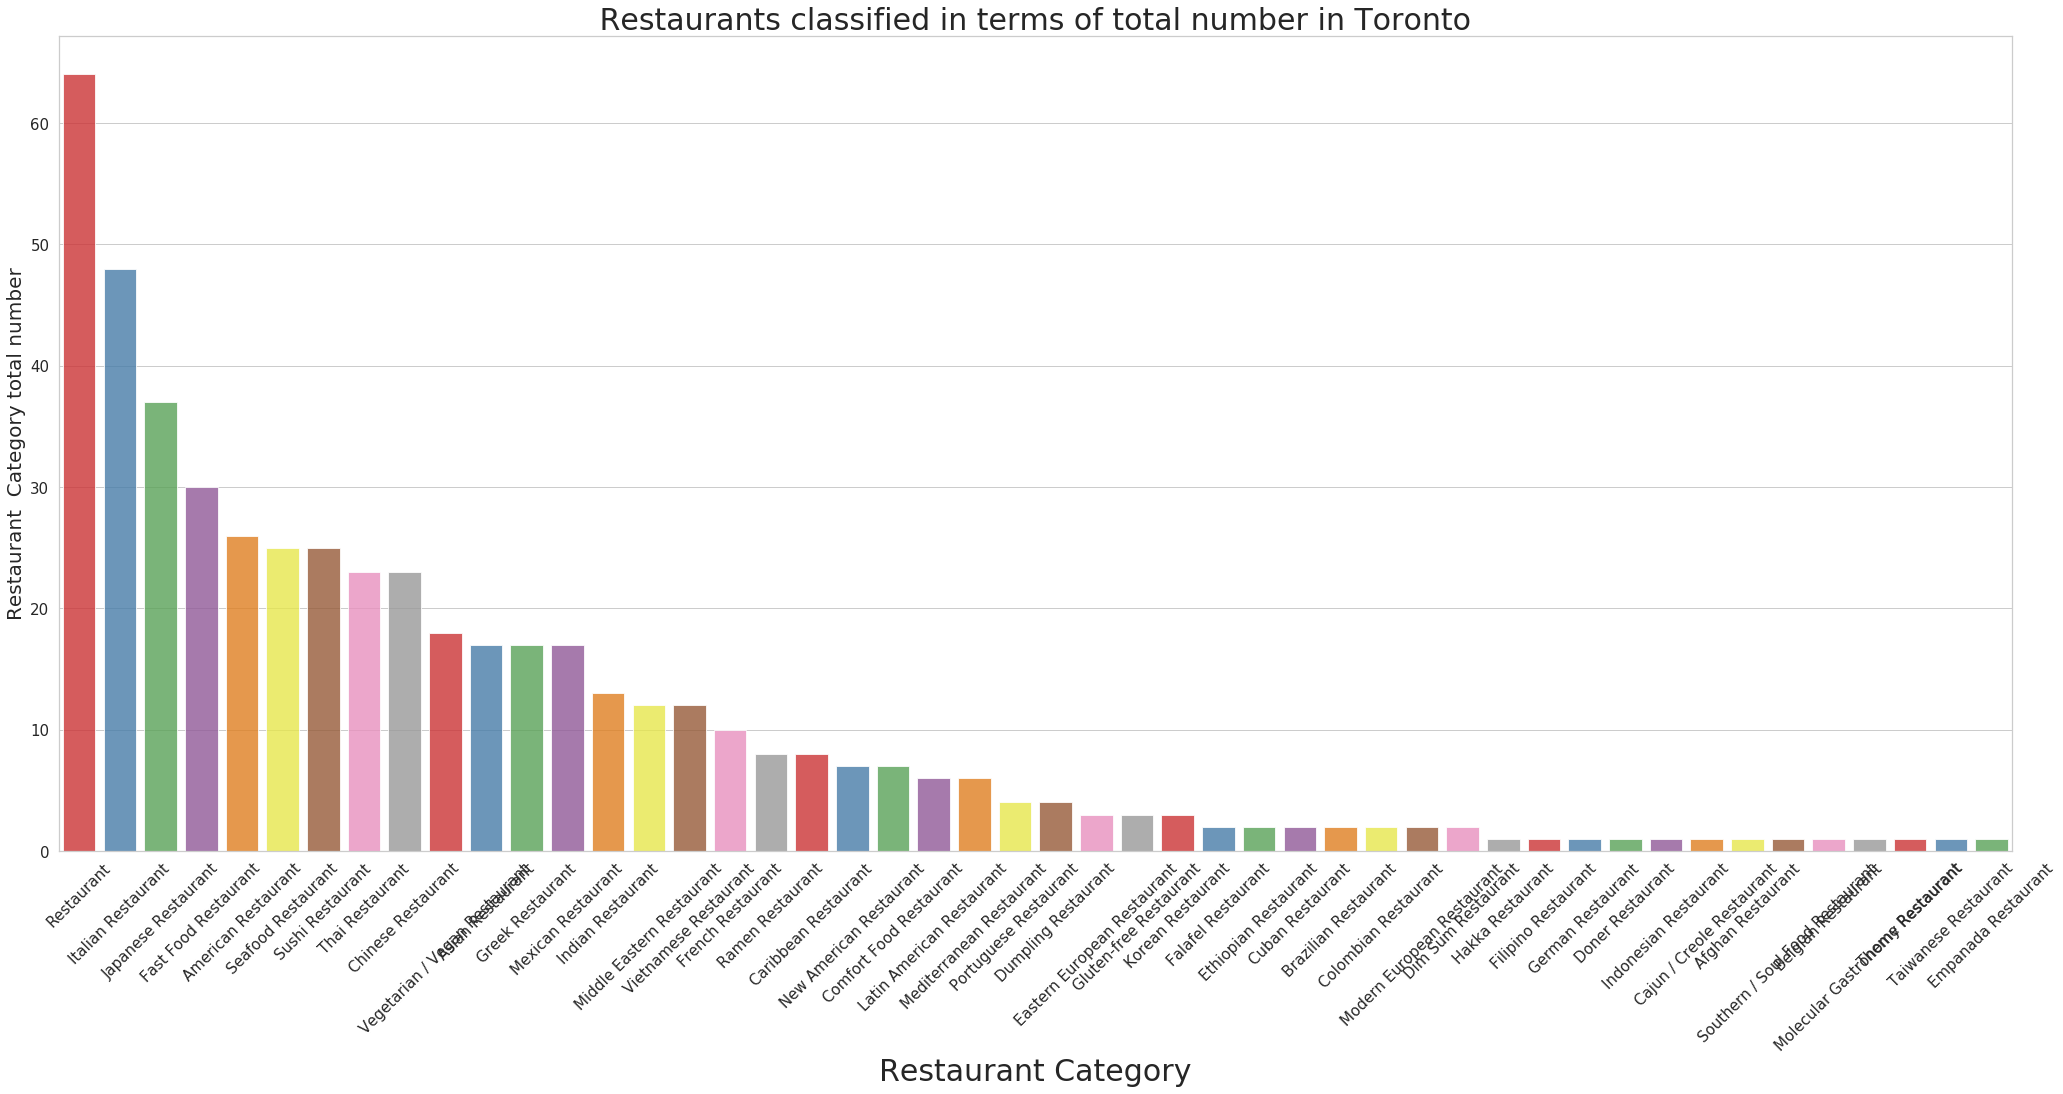

In [137]:
sn.set(style="whitegrid")
plt.figure(figsize=(35,15))
chart=sns.barplot(Toronto_top_50_restau["Restaurant type"].to_list(),Toronto_top_50_restau["Restaurant type total number"], alpha=0.8,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.axes.set_title(' Restaurants classified in terms of total number in Toronto ',fontsize=30)
chart.set_xlabel("Restaurant Category",fontsize=30)
chart.set_ylabel("Restaurant  Category total number",fontsize=20)
chart.tick_params(labelsize=15)
plt.show()

# Unique venues

In [82]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 265 uniques categories.


In [140]:
Toronto_venues=Toronto_filtered

#  Analyze Each Neighborhood

In [141]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot =Toronto_onehot[fixed_columns]

Toronto_onehot.head()

Neighborhood  Afghan Restaurant  American Restaurant  \
0                     Rouge,Malvern                  0                    0   
7   Guildwood,Morningside,West Hill                  0                    0   
14                           Woburn                  0                    0   
15                        Cedarbrae                  0                    0   
16                        Cedarbrae                  0                    0   

    Asian Restaurant  Belgian Restaurant  Brazilian Restaurant  \
0                  0                   0                     0   
7                  0                   0                     0   
14                 0                   0                     0   
15                 0                   0                     0   
16                 0                   0                     0   

    Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                           0                     0                   0   
7                           0                     0                   0   
14                          0                     0                   0   
15                          0                     0                   0   
16                          0                     1                   0   

    Colombian Restaurant  Comfort Food Restaurant  Cuban Restaurant  \
0                      0                        0                 0   
7                      0                        0                 0   
14                     0                        0                 0   
15                     0                        0                 0   
16                     0                        0                 0   

    Dim Sum Restaurant  Doner Restaurant  Dumpling Restaurant  \
0                    0                 0                    0   
7                    0                 0                    0   
14                   0                 0                    0   
15                   0                 0                    0   
16                   0                 0                    0   

    Eastern European Restaurant  Empanada Restaurant  Ethiopian Restaurant  \
0                             0                    0                     0   
7                             0                    0                     0   
14                            0                    0                     0   
15                            0                    0                     0   
16                            0                    0                     0   

    Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
0                    0                     1                    0   
7                    0                     0                    0   
14                   0                     0                    0   
15                   0                     0                    0   
16                   0                     0                    0   

    French Restaurant  German Restaurant  Gluten-free Restaurant  \
0                   0                  0                       0   
7                   0                  0                       0   
14                  0                  0                       0   
15                  0                  0                       0   
16                  0                  0                       0   

    Greek Restaurant  Hakka Restaurant  Indian Restaurant  \
0                  0                 0                  0   
7                  0                 0                  0   
14                 0                 0                  0   
15                 0                 1                  0   
16                 0                 0                  0   

    Indonesian Restaurant  Italian Restaurant  Japanese Restaurant  \
0                       0                   0                    0   
7                       0                   0                    0   
14          

In [142]:
Toronto_onehot.shape

(503, 49)

In [143]:
Toronto_grouped =Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

Neighborhood  Afghan Restaurant  \
0                              Adelaide,King,Richmond           0.000000   
1                                           Agincourt           0.000000   
2   Albion Gardens,Beaumond Heights,Humbergate,Jam...           0.000000   
3       Bathurst Manor,Downsview North,Wilson Heights           0.000000   
4                                     Bayview Village           0.000000   
5                    Bedford Park,Lawrence Manor East           0.000000   
6                                         Berczy Park           0.000000   
7          Brockton,Exhibition Place,Parkdale Village           0.000000   
8   Business Reply Mail Processing Centre 969 Eastern           0.000000   
9                          Cabbagetown,St. James Town           0.000000   
10                                Caledonia-Fairbanks           0.000000   
11              Canada Post Gateway Processing Centre           0.000000   
12                                          Cedarbrae           0.000000   
13                                 Central Bay Street           0.000000   
14            Chinatown,Grange Park,Kensington Market           0.000000   
15                                           Christie           0.000000   
16                               Church and Wellesley           0.037037   
17              Clarks Corners,Sullivan,Tam O'Shanter           0.000000   
18      Cliffcrest,Cliffside,Scarborough Village West           0.000000   
19                      Commerce Court,Victoria Hotel           0.000000   
20                                         Davisville           0.000000   
21  Deer Park,Forest Hill SE,Rathnelly,South Hill,...           0.000000   
22        Del Ray,Keelesdale,Mount Dennis,Silverthorn           0.000000   
23            Design Exchange,Toronto Dominion Centre           0.000000   
24                                    Don Mills North           0.000000   
25  Dorset Park,Scarborough Town Centre,Wexford He...           0.000000   
26                        Dovercourt Village,Dufferin           0.000000   
27          East Birchmount Park,Ionview,Kennedy Park           0.000000   
28                         Fairview,Henry Farm,Oriole           0.000000   
29              First Canadian Place,Underground city           0.000000   
30                    Flemingdon Park,Don Mills South           0.000000   
31                 Forest Hill North,Forest Hill West           0.000000   
32                                          Glencairn           0.000000   
33                    Guildwood,Morningside,West Hill           0.000000   
34                      Harbord,University of Toronto           0.000000   
35                                       Harbourfront           0.000000   
36    Harbourfront East,Toronto Islands,Union Station           0.000000   
37                       High Park,The Junction South           0.000000   
38                                  Hillcrest Village           0.000000   
39         Humber Bay Shores,Mimico South,New Toronto           0.000000   
40                                      Humber Summit           0.000000   
41  Kingsway Park South West,Mimico NW,The Queensw...           0.000000   
42                                    L'Amoreaux West           0.000000   
43                    Lawrence Heights,Lawrence Manor           0.000000   
44                                            Leaside           0.000000   
45                            Little Portugal,Trinity           0.000000   
46                                   Maryvale,Wexford           0.000000   
47                         Moore Park,Summerhill East           0.000000   
48                                 North Toronto West           0.000000   
49                     Northwood Park,York University           0.000000   
50                              Parkdale,Roncesvalles           0.000000   
51                                       Queen's Park           0.000000   
52           

In [144]:
Toronto_grouped.shape

(69, 49)

# Let's print each neighborhood along with the top 5 most common venues

In [145]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
                           venue  freq
0               Asian Restaurant  0.12
1                Thai Restaurant  0.12
2                     Restaurant  0.12
3  Vegetarian / Vegan Restaurant  0.08
4            American Restaurant  0.08


----Agincourt----
                       venue  freq
0  Latin American Restaurant   1.0
1          Afghan Restaurant   0.0
2        American Restaurant   0.0
3      Indonesian Restaurant   0.0
4         Italian Restaurant   0.0


----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
                  venue  freq
0  Fast Food Restaurant   1.0
1     Afghan Restaurant   0.0
2     Indian Restaurant   0.0
3    Italian Restaurant   0.0
4   Japanese Restaurant   0.0


----Bathurst Manor,Downsview North,Wilson Heights----
                       venue  freq
0           Sushi Restaurant  0.25
1         Chinese Restaurant  0.25
2                 Restaurant  0.25
3  Middle Easter

# Let's put that into a pandas dataframe

*First, let's write a function to sort the venues in descending order.*

*Now let's create the new dataframe and display the top 10 venues for each neighborhood.*

In [146]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood  \
0                             Adelaide,King,Richmond   
1                                          Agincourt   
2  Albion Gardens,Beaumond Heights,Humbergate,Jam...   
3      Bathurst Manor,Downsview North,Wilson Heights   
4                                    Bayview Village   

       1st Most Common Venue  2nd Most Common Venue  \
0            Thai Restaurant       Asian Restaurant   
1  Latin American Restaurant  Vietnamese Restaurant   
2       Fast Food Restaurant  Vietnamese Restaurant   
3  Middle Eastern Restaurant       Sushi Restaurant   
4        Japanese Restaurant     Chinese Restaurant   

           3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0                     Restaurant   American Restaurant       Sushi Restaurant   
1         Gluten-free Restaurant     French Restaurant    Filipino Restaurant   
2  Vegetarian / Vegan Restaurant     German Restaurant      French Restaurant   
3                     Restaurant    Chinese Restaurant  Vietnamese Restaurant   
4          Vietnamese Restaurant      Doner Restaurant      French Restaurant   

  6th Most Common Venue          7th Most Common Venue 8th Most Common Venue  \
0    Seafood Restaurant  Vegetarian / Vegan Restaurant  Colombian Restaurant   
1  Fast Food Restaurant             Falafel Restaurant  Ethiopian Restaurant   
2   Filipino Restaurant             Falafel Restaurant  Ethiopian Restaurant   
3   Filipino Restaurant           Fast Food Restaurant    Falafel Restaurant   
4   Filipino Restaurant           Fast Food Restaurant    Falafel Restaurant   

    9th Most Common Venue       10th Most Common Venue  
0  Gluten-free Restaurant          Japanese Restaurant  
1     Empanada Restaurant  Eastern European Restaurant  
2     Empanada Restaurant  Eastern European Restaurant  
3    Ethiopian Restaurant          Empanada Restaurant  
4    Ethiopian Restaurant          Empanada Restaurant

# Cluster Neighborhoods

*Run k-means to cluster the neighborhood into 5 clusters.*

In [147]:
Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

In [149]:
T_Sum_of_squared_distances = []
T_K = range(1,30)
for k in T_K:
    km = KMeans(n_clusters=k)
    km = km.fit(Toronto_grouped_clustering)
    T_Sum_of_squared_distances.append(km.inertia_)
    

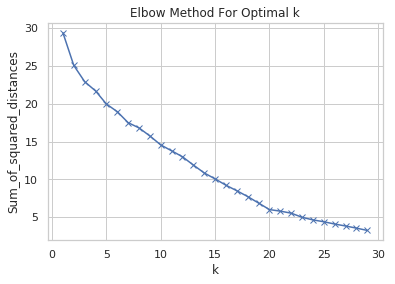

In [150]:
plt.plot(T_K, T_Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [151]:
# set # In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5
Tkclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters=Tkclusters,random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

*Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.*

In [152]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Toronto_merged.dropna(inplace=True)

Toronto_merged.head() # check the last columns!

Postcode      Borough                               Neighborhood   Latitude  \
0      M1B  Scarborough                              Rouge,Malvern  43.806686   
2      M1E  Scarborough            Guildwood,Morningside,West Hill  43.763573   
3      M1G  Scarborough                                     Woburn  43.770992   
4      M1H  Scarborough                                  Cedarbrae  43.773136   
6      M1K  Scarborough  East Birchmount Park,Ionview,Kennedy Park  43.727929   

   Longitude  Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
0 -79.194353             1.0  Fast Food Restaurant  Vietnamese Restaurant   
2 -79.188711             0.0    Mexican Restaurant  Vietnamese Restaurant   
3 -79.216917             0.0     Korean Restaurant  Vietnamese Restaurant   
4 -79.239476             0.0      Hakka Restaurant        Thai Restaurant   
6 -79.262029             0.0    Chinese Restaurant  Vietnamese Restaurant   

           3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0  Vegetarian / Vegan Restaurant      German Restaurant     French Restaurant   
2         Gluten-free Restaurant      French Restaurant   Filipino Restaurant   
3         Gluten-free Restaurant      French Restaurant   Filipino Restaurant   
4           Caribbean Restaurant  Vietnamese Restaurant      Doner Restaurant   
6               Doner Restaurant      German Restaurant     French Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0   Filipino Restaurant    Falafel Restaurant  Ethiopian Restaurant   
2  Fast Food Restaurant    Falafel Restaurant  Ethiopian Restaurant   
3  Fast Food Restaurant    Falafel Restaurant  Ethiopian Restaurant   
4     French Restaurant   Filipino Restaurant  Fast Food Restaurant   
6   Filipino Restaurant  Fast Food Restaurant    Falafel Restaurant   

  9th Most Common Venue       10th Most Common Venue  
0   Empanada Restaurant  Eastern European Restaurant  
2   Empanada Restaurant  Eastern European Restaurant  
3   Empanada Restaurant  Eastern European Restaurant  
4    Falafel Restaurant         Ethiopian Restaurant  
6  Ethiopian Restaurant          Empanada Restaurant

# Let visualize the final cluster

In [153]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(Tkclusters)
ys = [i + x + (i*x)**2 for i in range(Tkclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Toronto_mergedNew=Toronto_merged.dropna(subset=['Cluster Labels'])
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_mergedNew['Latitude'],Toronto_mergedNew['Longitude'],Toronto_mergedNew['Neighborhood'],Toronto_mergedNew['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Let examine the cluster


*Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to y*

**Cluster 1**

In [154]:
Toronto_mergedNew.loc[Toronto_mergedNew['Cluster Labels'] == 0,Toronto_mergedNew.columns[[1] + list(range(5,Toronto_mergedNew.shape[1]))]]

Borough  Cluster Labels          1st Most Common Venue  \
2        Scarborough             0.0             Mexican Restaurant   
3        Scarborough             0.0              Korean Restaurant   
4        Scarborough             0.0               Hakka Restaurant   
6        Scarborough             0.0             Chinese Restaurant   
8        Scarborough             0.0            American Restaurant   
10       Scarborough             0.0              Indian Restaurant   
12       Scarborough             0.0      Latin American Restaurant   
13       Scarborough             0.0                Thai Restaurant   
17        North York             0.0       Mediterranean Restaurant   
18        North York             0.0           Fast Food Restaurant   
19        North York             0.0            Japanese Restaurant   
22        North York             0.0               Ramen Restaurant   
26        North York             0.0            Japanese Restaurant   
27        North York             0.0               Asian Restaurant   
28        North York             0.0      Middle Eastern Restaurant   
34        North York             0.0          Portuguese Restaurant   
36         East York             0.0               Asian Restaurant   
38         East York             0.0               Sushi Restaurant   
39         East York             0.0              Indian Restaurant   
41      East Toronto             0.0               Greek Restaurant   
42      East Toronto             0.0           Fast Food Restaurant   
43      East Toronto             0.0            American Restaurant   
46   Central Toronto             0.0           Fast Food Restaurant   
47   Central Toronto             0.0               Sushi Restaurant   
49   Central Toronto             0.0          Vietnamese Restaurant   
51  Downtown Toronto             0.0                     Restaurant   
52  Downtown Toronto             0.0               Sushi Restaurant   
53  Downtown Toronto             0.0                     Restaurant   
54  Downtown Toronto             0.0            Japanese Restaurant   
55  Downtown Toronto             0.0                     Restaurant   
56  Downtown Toronto             0.0             Seafood Restaurant   
57  Downtown Toronto             0.0             Italian Restaurant   
58  Downtown Toronto             0.0                Thai Restaurant   
59  Downtown Toronto             0.0             Italian Restaurant   
60  Downtown Toronto             0.0                     Restaurant   
61  Downtown Toronto             0.0                     Restaurant   
62        North York             0.0           Fast Food Restaurant   
64   Central Toronto             0.0               Sushi Restaurant   
65   Central Toronto             0.0  Vegetarian / Vegan Restaurant   
66  Downtown Toronto             0.0                     Restaurant   
67  Downtown Toronto             0.0          Vietnamese Restaurant   
69  Downtown Toronto             0.0                     Restaurant   
70  Downtown Toronto             0.0                     Restaurant   
71        North York             0.0          Vietnamese Restaurant   
72        North York             0.0            Japanese Restaurant   
75  Downtown Toronto             0.0             Italian Restaurant   
76      West Toronto             0.0           Fast Food Restaurant   
77      West Toronto             0.0               Asian Restaurant   
78      West Toronto             0.0             Italian Restaurant   
82      West Toronto             0.0                Thai Restaurant   
83      West Toronto             0.0               Cuban Restaurant   
84      West Toronto             0.0               Sushi Restaurant   
85  Downtown Toronto             0.0           Fast Food Restaurant   
86       Mississauga             0.0            American Restaurant   
87      East Toronto             0.0           Fast Food Restaurant   
88         Etobicoke             0.0 

**Cluster 2**

In [155]:
Toronto_mergedNew.loc[Toronto_mergedNew['Cluster Labels'] == 1,Toronto_mergedNew.columns[[1] + list(range(5,Toronto_mergedNew.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
0    Scarborough             1.0  Fast Food Restaurant  Vietnamese Restaurant   
15   Scarborough             1.0  Fast Food Restaurant     Chinese Restaurant   
35     East York             1.0  Fast Food Restaurant  Vietnamese Restaurant   
74          York             1.0  Fast Food Restaurant  Vietnamese Restaurant   
92     Etobicoke             1.0  Fast Food Restaurant  Vietnamese Restaurant   
101    Etobicoke             1.0  Fast Food Restaurant  Vietnamese Restaurant   

             3rd Most Common Venue 4th Most Common Venue  \
0    Vegetarian / Vegan Restaurant     German Restaurant   
15           Vietnamese Restaurant      Doner Restaurant   
35   Vegetarian / Vegan Restaurant     German Restaurant   
74   Vegetarian / Vegan Restaurant     German Restaurant   
92   Vegetarian / Vegan Restaurant     German Restaurant   
101  Vegetarian / Vegan Restaurant     German Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0       French Restaurant   Filipino Restaurant    Falafel Restaurant   
15      German Restaurant     French Restaurant   Filipino Restaurant   
35      French Restaurant   Filipino Restaurant    Falafel Restaurant   
74      French Restaurant   Filipino Restaurant    Falafel Restaurant   
92      French Restaurant   Filipino Restaurant    Falafel Restaurant   
101     French Restaurant   Filipino Restaurant    Falafel Restaurant   

    8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
0    Ethiopian Restaurant   Empanada Restaurant  Eastern European Restaurant  
15     Falafel Restaurant  Ethiopian Restaurant          Empanada Restaurant  
35   Ethiopian Restaurant   Empanada Restaurant  Eastern European Restaurant  
74   Ethiopian Restaurant   Empanada Restaurant  Eastern European Restaurant  
92   Ethiopian Restaurant   Empanada Restaurant  Eastern European Restaurant  
101  Ethiopian Restaurant   Empanada Restaurant  Eastern European Restaurant

**Cluster 3**

In [156]:
Toronto_mergedNew.loc[Toronto_mergedNew['Cluster Labels'] == 2,Toronto_mergedNew.columns[[1] + list(range(5,Toronto_mergedNew.shape[1]))]]

Borough  Cluster Labels      1st Most Common Venue  \
11  Scarborough             2.0  Middle Eastern Restaurant   
99    Etobicoke             2.0         Chinese Restaurant   

        2nd Most Common Venue   3rd Most Common Venue 4th Most Common Venue  \
11      Vietnamese Restaurant  Gluten-free Restaurant     French Restaurant   
99  Middle Eastern Restaurant   Vietnamese Restaurant      Doner Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
11   Filipino Restaurant  Fast Food Restaurant    Falafel Restaurant   
99     French Restaurant   Filipino Restaurant  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
11  Ethiopian Restaurant   Empanada Restaurant  Eastern European Restaurant  
99    Falafel Restaurant  Ethiopian Restaurant          Empanada Restaurant

**Cluster 4**

In [157]:
Toronto_mergedNew.loc[Toronto_mergedNew['Cluster Labels'] == 3,Toronto_mergedNew.columns[[1] + list(range(5,Toronto_mergedNew.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
48  Central Toronto             3.0            Restaurant   
80             York             3.0            Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
48  Vietnamese Restaurant    Dim Sum Restaurant     French Restaurant   
80  Vietnamese Restaurant    Dim Sum Restaurant     French Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
48   Filipino Restaurant  Fast Food Restaurant    Falafel Restaurant   
80   Filipino Restaurant  Fast Food Restaurant    Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
48  Ethiopian Restaurant   Empanada Restaurant  Eastern European Restaurant  
80  Ethiopian Restaurant   Empanada Restaurant  Eastern European Restaurant

**Cluster 5**

In [158]:
Toronto_mergedNew.loc[Toronto_mergedNew['Cluster Labels'] == 4,Toronto_mergedNew.columns[[1] + list(range(5,Toronto_mergedNew.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
29  North York             4.0  Caribbean Restaurant  Vietnamese Restaurant   
81        York             4.0  Caribbean Restaurant  Vietnamese Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
29      Doner Restaurant     German Restaurant     French Restaurant   
81      Doner Restaurant     German Restaurant     French Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
29   Filipino Restaurant  Fast Food Restaurant    Falafel Restaurant   
81   Filipino Restaurant  Fast Food Restaurant    Falafel Restaurant   

   9th Most Common Venue 10th Most Common Venue  
29  Ethiopian Restaurant    Empanada Restaurant  
81  Ethiopian Restaurant    Empanada Restaurant

# Paris Neighbourhoods analysis

In [15]:
DataParis=pd.read_html("https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris")

In [16]:
DataParis=DataParis[0]

In [17]:
DataParis.head()

Arrondissement[1],[n 1] Quartiers                Quartiers.1  \
0    1er arrondissementdit « du Louvre »       1er  Saint-Germain-l'Auxerrois   
1    1er arrondissementdit « du Louvre »        2e                     Halles   
2    1er arrondissementdit « du Louvre »        3e               Palais-Royal   
3    1er arrondissementdit « du Louvre »        4e              Place-Vendôme   
4  2e arrondissementdit « de la Bourse »        5e                    Gaillon   

  Population en1999 (hab.)[2]  Superficie(ha)[2] Densitéhab/km2  Plan  
0                       1 672                869          1 924   NaN  
1                       8 984                412         21 806   NaN  
2                       3 195                274         11 661   NaN  
3                       3 044                269         11 316   NaN  
4                       1 345                188          7 154   NaN

In [18]:
DataParis=DataParis[["Arrondissement[1],[n 1]","Quartiers.1"]]

In [21]:
DataParis.head()

Arrondissement[1],[n 1]                Quartiers.1
0    1er arrondissementdit « du Louvre »  Saint-Germain-l'Auxerrois
1    1er arrondissementdit « du Louvre »                     Halles
2    1er arrondissementdit « du Louvre »               Palais-Royal
3    1er arrondissementdit « du Louvre »              Place-Vendôme
4  2e arrondissementdit « de la Bourse »                    Gaillon

In [22]:
DataParis.rename(columns={"Arrondissement[1],[n 1]": "Borough", "Quartiers.1": "Neighborhood"},inplace=True)

In [23]:
DataParis.head()

Borough               Neighborhood
0    1er arrondissementdit « du Louvre »  Saint-Germain-l'Auxerrois
1    1er arrondissementdit « du Louvre »                     Halles
2    1er arrondissementdit « du Louvre »               Palais-Royal
3    1er arrondissementdit « du Louvre »              Place-Vendôme
4  2e arrondissementdit « de la Bourse »                    Gaillon

*Let analyse the Paris data*

In [24]:
DataParis.shape

(80, 2)

In [25]:
#check missing data
null_data = DataParis[DataParis.isnull().any(axis=1)]
null_data.shape

(0, 2)

**let sort paris data by Neihborhood**

# Let download data with coordinates

In [26]:
DataParis=DataParis.sort_values(by=['Neighborhood'])
DataParis=DataParis.reset_index(drop=True)

In [27]:
DataParis.head()

Borough     Neighborhood
0  19e arrondissementdit « des Buttes-Chaumont »         Amérique
1             3e arrondissementdit « du Temple »         Archives
2   4e arrondissementdit « de l'Hôtel-de-Ville »          Arsenal
3             3e arrondissementdit « du Temple »  Arts-et-Métiers
4             16e arrondissementdit « de Passy »          Auteuil

In [29]:
!wget -q -O 'Geospatial_dataParis.csv'  "https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true&csv_separator=%3B"
print('Data downloaded!')

Data downloaded!


In [30]:
donnesGeographique=pd.read_csv('Geospatial_dataParis.csv', sep=';', delimiter=None, header='infer')
donnesGeographique.head()

N_SQ_QU  C_QU  C_QUINSEE           L_QU  C_AR    N_SQ_AR    PERIMETRE  \
0  750000019    19    7510503   Val-de-Grâce     5  750000005  3485.831358   
1  750000058    58    7511502         Necker    15  750000015  5979.711469   
2  750000079    79    7512003  Père-Lachaise    20  750000020  5013.656432   
3  750000072    72    7511804    La Chapelle    18  750000018  5261.436596   
4  750000015    15    7510403        Arsenal     4  750000004  2878.559656   

        SURFACE                 Geometry X Y  \
0  7.036312e+05   48.841684288,2.34386092632   
1  1.578484e+06  48.8427112503,2.31077745364   
2  1.599002e+06   48.863719484,2.39527282076   
3  1.347545e+06  48.8940121696,2.36438677903   
4  4.872649e+05   48.851585175,2.36476795387   

                                            Geometry  
0  {"type": "Polygon", "coordinates": [[[2.345484...  
1  {"type": "Polygon", "coordinates": [[[2.306149...  
2  {"type": "Polygon", "coordinates": [[[2.395358...  
3  {"type": "Polygon", "coordinates": [[[2.365803...  
4  {"type": "Polygon", "coordinates": [[[2.368512...

In [31]:
donnesGeographique.shape

(80, 10)

In [32]:
donnesGeographique=donnesGeographique[["L_QU","Geometry X Y"]]
donnesGeographique.head()

L_QU                 Geometry X Y
0   Val-de-Grâce   48.841684288,2.34386092632
1         Necker  48.8427112503,2.31077745364
2  Père-Lachaise   48.863719484,2.39527282076
3    La Chapelle  48.8940121696,2.36438677903
4        Arsenal   48.851585175,2.36476795387

In [33]:
# let rename the L
donnesGeographique.rename(columns={"L_QU": "Neighborhood"},inplace=True)

*Let sort the data by Neighborhood*

In [34]:
donnesGeographique=donnesGeographique.sort_values(by=['Neighborhood'])
donnesGeographique=donnesGeographique.reset_index(drop=True)

In [35]:
donnesGeographique.head()

Neighborhood                 Geometry X Y
0         Amérique  48.8816381673,2.39544016662
1         Archives  48.8591924127,2.36320505733
2          Arsenal   48.851585175,2.36476795387
3  Arts-et-Métiers  48.8664702895,2.35708313106
4          Auteuil  48.8506223427,2.25227690754

In [36]:
donneeX=[elt.split(',')[0] for elt in donnesGeographique["Geometry X Y"].to_numpy()]
donneeY=[elt.split(',')[1] for elt in donnesGeographique["Geometry X Y"].to_numpy()]

In [37]:
donnesGeographique['latitude']=donneeX
donnesGeographique['longitude']=donneeY

In [38]:
donnesGeographique.head()

Neighborhood                 Geometry X Y       latitude      longitude
0         Amérique  48.8816381673,2.39544016662  48.8816381673  2.39544016662
1         Archives  48.8591924127,2.36320505733  48.8591924127  2.36320505733
2          Arsenal   48.851585175,2.36476795387   48.851585175  2.36476795387
3  Arts-et-Métiers  48.8664702895,2.35708313106  48.8664702895  2.35708313106
4          Auteuil  48.8506223427,2.25227690754  48.8506223427  2.25227690754

In [39]:
donnesGeographique.drop(columns=['Geometry X Y'],inplace=True)

In [40]:
donnesGeographique.head()

Neighborhood       latitude      longitude
0         Amérique  48.8816381673  2.39544016662
1         Archives  48.8591924127  2.36320505733
2          Arsenal   48.851585175  2.36476795387
3  Arts-et-Métiers  48.8664702895  2.35708313106
4          Auteuil  48.8506223427  2.25227690754

In [41]:
donnesGeographique.shape

(80, 3)

In [42]:
#Let add the Borough column
donnesGeographique['Borough']=DataParis['Borough']
#let add the Borough to the first colum 
finalindex=['Borough','Neighborhood','latitude','longitude']
ParisFinaldata=donnesGeographique[finalindex]

In [43]:
ParisFinaldata.head()

Borough     Neighborhood  \
0  19e arrondissementdit « des Buttes-Chaumont »         Amérique   
1             3e arrondissementdit « du Temple »         Archives   
2   4e arrondissementdit « de l'Hôtel-de-Ville »          Arsenal   
3             3e arrondissementdit « du Temple »  Arts-et-Métiers   
4             16e arrondissementdit « de Passy »          Auteuil   

        latitude      longitude  
0  48.8816381673  2.39544016662  
1  48.8591924127  2.36320505733  
2   48.851585175  2.36476795387  
3  48.8664702895  2.35708313106  
4  48.8506223427  2.25227690754

In [44]:
ParisFinaldata.rename(columns={"latitude": "Latitude","longitude": "Longitude"},inplace=True)

In [51]:
ParisFinaldata.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [52]:
ParisFinaldata["Latitude"] = ParisFinaldata["Latitude"].astype(float)
ParisFinaldata["Longitude"] = ParisFinaldata["Longitude"].astype(float)

In [53]:
ParisFinaldata.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [54]:
ParisFinaldata.Latitude[0]

48.8816381673

In [55]:
type(ParisFinaldata.Latitude[0])

numpy.float64

# With the obtained data let use foursqure API to anlyse paris dataset

In [147]:
address = 'Paris'
boll=1
while boll ==1:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        Platitude = location.latitude
        Plongitude = location.longitude
        print('The geograpical coordinate of Paris are {}, {}.'.format(Platitude,Plongitude))
        boll=0
    except Exception  as er:
         boll=1
    

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [148]:
# create map of New York using latitude and longitude values
map_Paris = folium.Map(location=[Platitude,Plongitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(ParisFinaldata['Latitude'],ParisFinaldata['Longitude'],ParisFinaldata['Borough'],ParisFinaldata['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
map_Paris

# Let set foursquare credential,same as the previuosly used

# Let's explore the first neighborhoods in our dataframe

In [57]:
ParisFinaldata.loc[0, 'Neighborhood']

'Amérique'

In [58]:
Paris_latitude0 = ParisFinaldata.loc[0, 'Latitude'] # neighborhood latitude value
Paris_longitude0 =ParisFinaldata.loc[0, 'Longitude'] # neighborhood longitude value

Parisneighborhood_name =ParisFinaldata.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Parisneighborhood_name, 
                                                               Paris_latitude0, 
                                                               Paris_longitude0))

Latitude and longitude values of Amérique are 48.8816381673, 2.39544016662.


# Now, let's get the top 100 venues that are in Amérique within a radius of 500 meters.

In [60]:
# type your answer here
LIMIT = 100
radius = 500
urlP = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Paris_latitude0, 
    Paris_longitude0, 
    radius, 
    LIMIT)
urlP

'https://api.foursquare.com/v2/venues/explore?&client_id=BF3KRSJVJ00WI2KN5ODMGWHPFKO5JEXD1XJV0TUEOH42TPRK&client_secret=QD31EF0JNJHJCX0FH4UOMEJDSWQ4AK5IDFP1PATDKGJGSK4W&v=20180605&ll=48.8816381673,2.39544016662&radius=500&limit=100'

In [63]:
resultsP = requests.get(urlP).json()
resultsP

{'meta': {'code': 200, 'requestId': '5e40628769babe001b04aa13'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Paris',
  'headerFullLocation': 'Paris',
  'headerLocationGranularity': 'city',
  'totalResults': 14,
  'suggestedBounds': {'ne': {'lat': 48.8861381718, 'lng': 2.4022702888013545},
   'sw': {'lat': 48.877138162799994, 'lng': 2.388610044438645}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b6df0e3f964a520a49d2ce3',
       'name': 'Aux Petits Joueurs',
       'location': {'address': '59 rue de Mouzaïa',
        'lat': 48.880434948703346,
        'lng': 2.396212420925634,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.880434948703346,
          'ln

In [66]:
from pandas.io.json import json_normalize
Parisvenues = resultsP['response']['groups'][0]['items']
    
Parisnearby_venues = json_normalize(Parisvenues) # flatten JSON

# filter columns
Parisfiltered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Parisnearby_venues =Parisnearby_venues.loc[:, Parisfiltered_columns]

# filter the category for each row
Parisnearby_venues['venue.categories'] = Parisnearby_venues.apply(get_category_type, axis=1)

# clean columns
Parisnearby_venues.columns = [col.split(".")[-1] for col in Parisnearby_venues.columns]

Parisnearby_venues.head()

name         categories        lat       lng
0                  Aux Petits Joueurs             Bistro  48.880435  2.396212
1                 Brasserie Le Danube  French Restaurant  48.882164  2.393235
2   Parc de la Butte du Chapeau Rouge               Park  48.881797  2.398892
3  Hipark by Adagio Paris La Villette    Bed & Breakfast  48.885537  2.397023
4             Piscine Georges Hermant               Pool  48.882667  2.389732

In [67]:
print('{} venues were returned by Foursquare.'.format(Parisnearby_venues.shape[0]))

14 venues were returned by Foursquare.


# Let explore the Neighborhoods in Paris

*Let's create a function to repeat the same process to all the neighborhoods in Toronto*

In [68]:
# type your answer here
bola=0
while bola==0:
    try:
        Paris_venues = getNearbyVenues(names=ParisFinaldata['Neighborhood'],
                                   latitudes=ParisFinaldata['Latitude'],
                                   longitudes=ParisFinaldata['Longitude'])
        bola=1
    except :
        bola=0

Amérique
Archives
Arsenal
Arts-et-Métiers
Auteuil
Batignolles
Bel-Air
Belleville
Bercy
Bonne-Nouvelle
Chaillot
Champs-Elysées
Charonne
Chaussée-d'Antin
Clignancourt
Combat
Croulebarbe
Ecole-Militaire
Enfants-Rouges
Epinettes
Europe
Faubourg-Montmartre
Faubourg-du-Roule
Folie-Méricourt
Gaillon
Gare
Goutte-d'Or
Grandes-Carrières
Grenelle
Gros-Caillou
Halles
Hôpital-Saint-Louis
Invalides
Jardin-des-Plantes
Javel
La Chapelle
Madeleine
Mail
Maison-Blanche
Monnaie
Montparnasse
Muette
Necker
Notre-Dame
Notre-Dame-des-Champs
Odéon
Palais-Royal
Parc-de-Montsouris
Petit-Montrouge
Picpus
Place-Vendôme
Plaine de Monceaux
Plaisance
Pont-de-Flandre
Porte-Dauphine
Porte-Saint-Denis
Porte-Saint-Martin
Père-Lachaise
Quinze-Vingts
Rochechouart
Roquette
Saint-Ambroise
Saint-Fargeau
Saint-Georges
Saint-Germain-des-Prés
Saint-Germain-l'Auxerrois
Saint-Gervais
Saint-Lambert
Saint-Merri
Saint-Thomas-d'Aquin
Saint-Victor
Saint-Vincent-de-Paul
Sainte-Avoie
Sainte-Marguerite
Salpêtrière
Sorbonne
Ternes
Val-de-G

In [69]:
print(Paris_venues.shape)
Paris_venues.head()

(5482, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Amérique              48.881638                 2.39544   
1     Amérique              48.881638                 2.39544   
2     Amérique              48.881638                 2.39544   
3     Amérique              48.881638                 2.39544   
4     Amérique              48.881638                 2.39544   

                                Venue  Venue Latitude  Venue Longitude  \
0                  Aux Petits Joueurs       48.880435         2.396212   
1                 Brasserie Le Danube       48.882164         2.393235   
2   Parc de la Butte du Chapeau Rouge       48.881797         2.398892   
3  Hipark by Adagio Paris La Villette       48.885537         2.397023   
4             Piscine Georges Hermant       48.882667         2.389732   

      Venue Category  
0             Bistro  
1  French Restaurant  
2               Park  
3    Bed & Breakfast  
4               Pool

In [70]:
#retrive all restaurant from Toronto data set
Paris_restaut=restaurantList(Paris_venues["Venue Category"].to_numpy())

In [71]:
#total  number of restaurant 
len(Paris_restaut)

1866

In [73]:
Paris_UniqueRestaurant=set(Paris_restaut)
len(Paris_UniqueRestaurant)

79

In [74]:
#let filter the data set containing ongly  restauraant
Paris_mask = Paris_venues["Venue Category"].isin(Paris_UniqueRestaurant)
Paris_filtered=Paris_venues[Paris_mask]

In [75]:
Paris_filtered.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1      Amérique              48.881638                2.395440   
6      Amérique              48.881638                2.395440   
12     Amérique              48.881638                2.395440   
21     Archives              48.859192                2.363205   
22     Archives              48.859192                2.363205   

                   Venue  Venue Latitude  Venue Longitude       Venue Category  
1    Brasserie Le Danube       48.882164         2.393235    French Restaurant  
6   La Table de Botzaris       48.880487         2.390838    French Restaurant  
12              Chez Kim       48.880079         2.394508     Asian Restaurant  
21          Chez Camille       48.857782         2.360755    French Restaurant  
22                  SoMa       48.861511         2.362146  Japanese Restaurant

In [76]:
Paris_series = pd.DataFrame(Paris_filtered["Venue Category"].value_counts())
Paris_series.rename(columns={"Venue Category":"Restaurant type total number"},inplace=True)
Paris_series["Restaurant type"]=Paris_series.index
#change the restaurant type position
Pinchange=[Paris_series.columns.to_list()[-1],Paris_series.columns.to_list()[0]]
Paris_series=Paris_series[Pinchange]
Paris_series.head()

Restaurant type  Restaurant type total number
French Restaurant      French Restaurant                           702
Italian Restaurant    Italian Restaurant                           206
Japanese Restaurant  Japanese Restaurant                           129
Restaurant                    Restaurant                            92
Chinese Restaurant    Chinese Restaurant                            49

In [77]:
Paris_series.shape

(79, 2)

In [94]:
#the 50 1st restaurant in termes of number of restaurant
Paris_top_15_restau=Paris_series.head(25)

#the 50 last restaurant in termes of number of restaurant
Paris_last_15_restau=Paris_series.tail(25)

In [110]:
for index, row in Paris_top_15_restau.iterrows():
    print(type(row["Restaurant type"]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

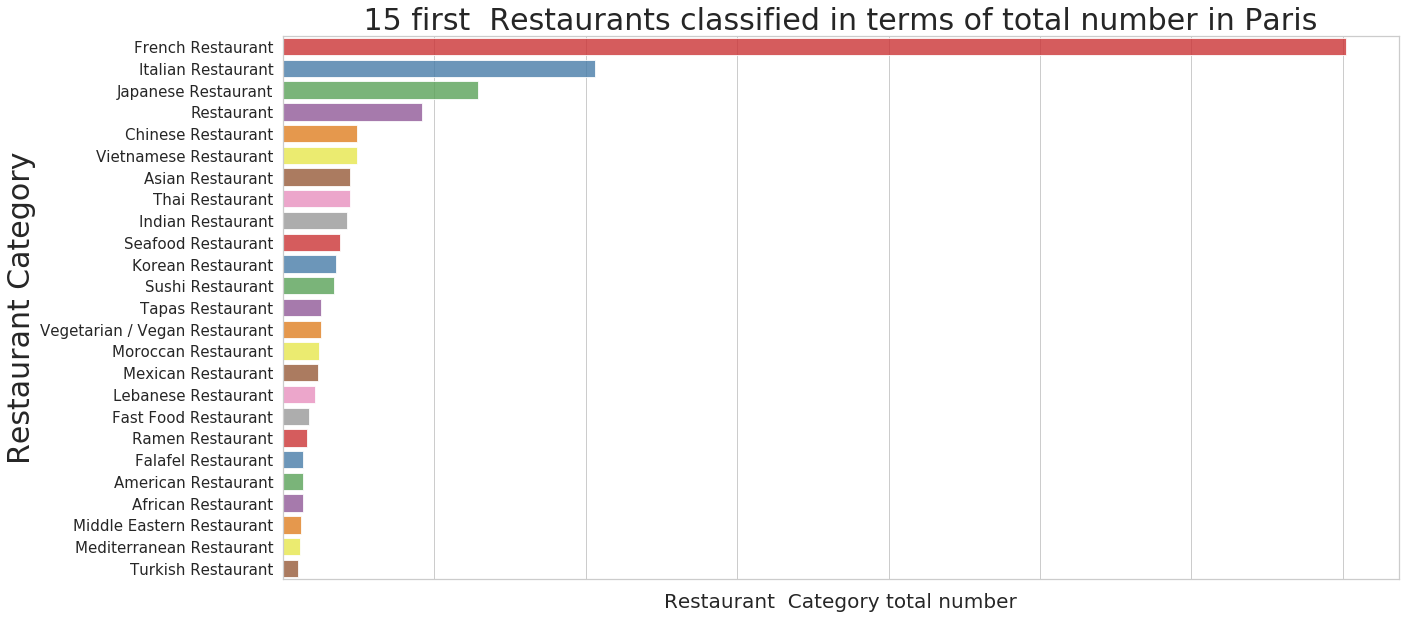

In [117]:
sn.set(style="whitegrid")
plt.figure(figsize=(20,10))
chart=sns.barplot(x=Paris_top_15_restau["Restaurant type total number"],y=Paris_top_15_restau["Restaurant type"].to_list(),alpha=0.8,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.axes.set_title(' 15 first  Restaurants classified in terms of total number in Paris ',fontsize=30)
chart.set_ylabel("Restaurant Category",fontsize=30)
chart.set_xlabel("Restaurant  Category total number",fontsize=20)
chart.tick_params(labelsize=15)
#for index, row in Paris_top_15_restau.iterrows():
#chart.text(row["Restaurant type total number"],row["Restaurant type"],row["Restaurant type total number"], color='black', ha="center")
plt.show()

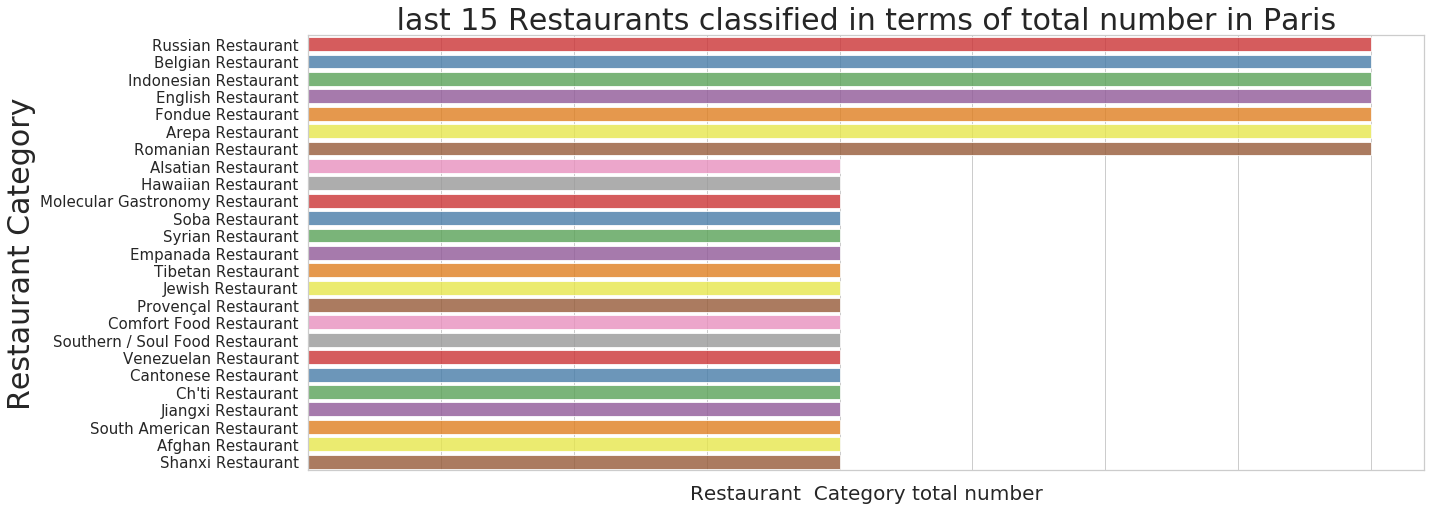

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
chart=sns.barplot(Paris_last_15_restau["Restaurant type total number"],Paris_last_15_restau["Restaurant type"].to_list(),alpha=0.8,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.axes.set_title(' last 15 Restaurants classified in terms of total number in Paris ',fontsize=30)
chart.set_ylabel("Restaurant Category",fontsize=30)
chart.set_xlabel("Restaurant  Category total number",fontsize=20)
chart.tick_params(labelsize=15)
plt.show()

# Unique venues

In [119]:
print('There are {} uniques categories.'.format(len(Paris_venues['Venue Category'].unique())))

There are 305 uniques categories.


In [123]:
Paris_venues.shape

(1866, 7)

In [120]:
Paris_venues=Paris_filtered

# Analyze Each Neighborhood

In [121]:
# one hot encoding
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
Paris_onehot['Neighborhood'] = Paris_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot=Paris_onehot[fixed_columns]
Paris_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  Alsatian Restaurant  \
1      Amérique                  0                   0                    0   
6      Amérique                  0                   0                    0   
12     Amérique                  0                   0                    0   
21     Archives                  0                   0                    0   
22     Archives                  0                   0                    0   

    American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
1                     0                 0                       0   
6                     0                 0                       0   
12                    0                 0                       0   
21                    0                 0                       0   
22                    0                 0                       0   

    Asian Restaurant  Auvergne Restaurant  Basque Restaurant  \
1                  0                    0                  0   
6                  0                    0                  0   
12                 1                    0                  0   
21                 0                    0                  0   
22                 0                    0                  0   

    Belgian Restaurant  Brazilian Restaurant  Breton Restaurant  \
1                    0                     0                  0   
6                    0                     0                  0   
12                   0                     0                  0   
21                   0                     0                  0   
22                   0                     0                  0   

    Burgundian Restaurant  Cajun / Creole Restaurant  Cambodian Restaurant  \
1                       0                          0                     0   
6                       0                          0                     0   
12                      0                          0                     0   
21                      0                          0                     0   
22                      0                          0                     0   

    Cantonese Restaurant  Ch'ti Restaurant  Chinese Restaurant  \
1                      0                 0                   0   
6                      0                 0                   0   
12                     0                 0                   0   
21                     0                 0                   0   
22                     0                 0                   0   

    Comfort Food Restaurant  Corsican Restaurant  Doner Restaurant  \
1                         0                    0                 0   
6                         0                    0                 0   
12                        0                    0                 0   
21                        0                    0                 0   
22                        0                    0                 0   

    Eastern European Restaurant  Empanada Restaurant  English Restaurant  \
1                             0                    0                   0   
6                             0                    0                   0   
12                            0                    0                   0   
21                            0                    0                   0   
22                            0                    0                   0   

    Ethiopian Restaurant  Falafel Restaurant  Fast Food Restaurant  \
1                      0                   0                     0   
6                      0                   0                     0   
12                     0                   0                     0   
21                     0                   0                     0   
22                     0                   0                     0   

    Fondue Restaurant  French Restaurant  Gluten-free Restaurant  \
1                   0                  1                       0   
6                   0   

In [124]:
Paris_onehot.shape

(1866, 80)

In [126]:
Paris_grouped =Paris_onehot.groupby('Neighborhood').mean().reset_index()
Paris_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0                    Amérique           0.000000            0.000000   
1                    Archives           0.000000            0.000000   
2                     Arsenal           0.000000            0.000000   
3             Arts-et-Métiers           0.000000            0.000000   
4                     Auteuil           0.000000            0.000000   
5                 Batignolles           0.000000            0.000000   
6                     Bel-Air           0.000000            0.000000   
7                  Belleville           0.000000            0.066667   
8                       Bercy           0.000000            0.000000   
9              Bonne-Nouvelle           0.000000            0.038462   
10                   Chaillot           0.000000            0.000000   
11             Champs-Elysées           0.000000            0.000000   
12                   Charonne           0.000000            0.000000   
13           Chaussée-d'Antin           0.000000            0.000000   
14               Clignancourt           0.000000            0.000000   
15                     Combat           0.000000            0.000000   
16                Croulebarbe           0.000000            0.000000   
17            Ecole-Militaire           0.000000            0.000000   
18             Enfants-Rouges           0.000000            0.000000   
19                  Epinettes           0.000000            0.000000   
20                     Europe           0.000000            0.000000   
21        Faubourg-Montmartre           0.000000            0.000000   
22          Faubourg-du-Roule           0.000000            0.000000   
23            Folie-Méricourt           0.000000            0.052632   
24                    Gaillon           0.000000            0.000000   
25                       Gare           0.000000            0.000000   
26                Goutte-d'Or           0.000000            0.000000   
27          Grandes-Carrières           0.000000            0.000000   
28                   Grenelle           0.000000            0.000000   
29               Gros-Caillou           0.000000            0.000000   
30                     Halles           0.000000            0.034483   
31        Hôpital-Saint-Louis           0.000000            0.000000   
32                  Invalides           0.000000            0.000000   
33         Jardin-des-Plantes           0.000000            0.000000   
34                      Javel           0.000000            0.000000   
35                La Chapelle           0.000000            0.000000   
36                  Madeleine           0.000000            0.000000   
37                       Mail           0.000000            0.000000   
38             Maison-Blanche           0.000000            0.000000   
39                    Monnaie           0.000000            0.000000   
40               Montparnasse           0.000000            0.000000   
41                     Muette           0.000000            0.000000   
42                     Necker           0.000000            0.000000   
43                 Notre-Dame           0.000000            0.000000   
44      Notre-Dame-des-Champs           0.000000            0.000000   
45                      Odéon           0.000000            0.000000   
46               Palais-Royal           0.000000            0.000000   
47         Parc-de-Montsouris           0.000000            0.000000   
48            Petit-Montrouge           0.000000            0.040000   
49              Place-Vendôme           0.000000            0.000000   
50         Plaine de Monceaux           0.000000            0.000000   
51                  Plaisance           0.000000            0.000000   
52            Pont-de-Flandre           0.000000            0.052632   
53          Porte-Saint-Denis           0.000000            0.022222   
54         Porte-Saint-Martin           0.000000         

In [127]:
Paris_grouped.shape

(78, 80)

# Let's print each neighborhood along with the top 5 most common venues

In [128]:
num_top_venues = 5

for hood in Paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Paris_grouped[Paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amérique----
                 venue  freq
0    French Restaurant  0.67
1     Asian Restaurant  0.33
2    Afghan Restaurant  0.00
3  Peruvian Restaurant  0.00
4   Russian Restaurant  0.00


----Archives----
                 venue  freq
0    French Restaurant  0.35
1   Italian Restaurant  0.12
2  Japanese Restaurant  0.12
3   Falafel Restaurant  0.08
4    Korean Restaurant  0.04


----Arsenal----
                           venue  freq
0              French Restaurant  0.40
1             Italian Restaurant  0.12
2               Tapas Restaurant  0.08
3             Seafood Restaurant  0.08
4  Vegetarian / Vegan Restaurant  0.08


----Arts-et-Métiers----
                   venue  freq
0      French Restaurant  0.27
1     Italian Restaurant  0.14
2             Restaurant  0.11
3     Chinese Restaurant  0.11
4  Vietnamese Restaurant  0.08


----Auteuil----
                 venue  freq
0    French Restaurant   1.0
1    Afghan Restaurant   0.0
2    Korean Restaurant   0.0
3   Russian Restau

# Let's put that into a pandas dataframe

*First, let's write a function to sort the venues in descending order.*

In [132]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Pneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Pneighborhoods_venues_sorted['Neighborhood'] = Paris_grouped['Neighborhood']

for ind in np.arange(Paris_grouped.shape[0]):
    Pneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

Pneighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
0         Amérique     French Restaurant       Asian Restaurant   
1         Archives     French Restaurant    Japanese Restaurant   
2          Arsenal     French Restaurant     Italian Restaurant   
3  Arts-et-Métiers     French Restaurant     Italian Restaurant   
4          Auteuil     French Restaurant  Vietnamese Restaurant   

           3rd Most Common Venue        4th Most Common Venue  \
0          Vietnamese Restaurant  Eastern European Restaurant   
1             Italian Restaurant           Falafel Restaurant   
2  Vegetarian / Vegan Restaurant             Tapas Restaurant   
3                     Restaurant           Chinese Restaurant   
4    Eastern European Restaurant          Empanada Restaurant   

   5th Most Common Venue           6th Most Common Venue  \
0    Empanada Restaurant              English Restaurant   
1             Restaurant             Moroccan Restaurant   
2     Seafood Restaurant  Southwestern French Restaurant   
3  Vietnamese Restaurant             Moroccan Restaurant   
4     English Restaurant            Ethiopian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
1    Israeli Restaurant       Thai Restaurant      Tapas Restaurant   
2  Brazilian Restaurant            Restaurant       Thai Restaurant   
3   Japanese Restaurant      Sushi Restaurant    Seafood Restaurant   
4    Falafel Restaurant  Fast Food Restaurant     Fondue Restaurant   

   10th Most Common Venue  
0       Fondue Restaurant  
1       Korean Restaurant  
2     Szechuan Restaurant  
3      Mexican Restaurant  
4  Gluten-free Restaurant

# Cluster Neighborhoods

*Run k-means to cluster the neighborhood into 5 clusters.*

In [135]:
Paris_grouped_clustering =Paris_grouped.drop('Neighborhood', 1)

In [142]:
P_Sum_of_squared_distances = []
P_K = range(1,10)
for k in P_K:
    km = KMeans(n_clusters=k)
    km = km.fit(Paris_grouped_clustering)
    P_Sum_of_squared_distances.append(km.inertia_)
    

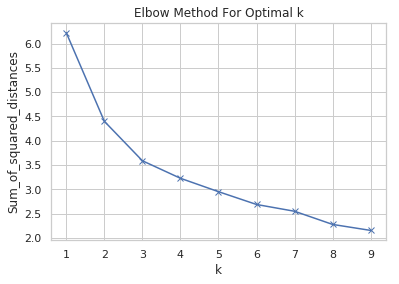

In [143]:
plt.plot(P_K, P_Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [144]:
# set number of clusters
Pkclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=Pkclusters,random_state=0).fit(Paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 2, 0, 1, 2, 1, 2, 0, 0], dtype=int32)

**Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.**

In [145]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Paris_merged=ParisFinaldata

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Paris_merged = Paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood').dropna()

Paris_merged.head() # check the last columns!

Borough     Neighborhood   Latitude  \
0  19e arrondissementdit « des Buttes-Chaumont »         Amérique  48.881638   
1             3e arrondissementdit « du Temple »         Archives  48.859192   
2   4e arrondissementdit « de l'Hôtel-de-Ville »          Arsenal  48.851585   
3             3e arrondissementdit « du Temple »  Arts-et-Métiers  48.866470   
4             16e arrondissementdit « de Passy »          Auteuil  48.850622   

   Longitude  Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
0   2.395440             1.0     French Restaurant       Asian Restaurant   
1   2.363205             2.0     French Restaurant    Japanese Restaurant   
2   2.364768             2.0     French Restaurant     Italian Restaurant   
3   2.357083             0.0     French Restaurant     Italian Restaurant   
4   2.252277             1.0     French Restaurant  Vietnamese Restaurant   

           3rd Most Common Venue        4th Most Common Venue  \
0          Vietnamese Restaurant  Eastern European Restaurant   
1             Italian Restaurant           Falafel Restaurant   
2  Vegetarian / Vegan Restaurant             Tapas Restaurant   
3                     Restaurant           Chinese Restaurant   
4    Eastern European Restaurant          Empanada Restaurant   

   5th Most Common Venue           6th Most Common Venue  \
0    Empanada Restaurant              English Restaurant   
1             Restaurant             Moroccan Restaurant   
2     Seafood Restaurant  Southwestern French Restaurant   
3  Vietnamese Restaurant             Moroccan Restaurant   
4     English Restaurant            Ethiopian Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
1    Israeli Restaurant       Thai Restaurant      Tapas Restaurant   
2  Brazilian Restaurant            Restaurant       Thai Restaurant   
3   Japanese Restaurant      Sushi Restaurant    Seafood Restaurant   
4    Falafel Restaurant  Fast Food Restaurant     Fondue Restaurant   

   10th Most Common Venue  
0       Fondue Restaurant  
1       Korean Restaurant  
2     Szechuan Restaurant  
3      Mexican Restaurant  
4  Gluten-free Restaurant

In [150]:
# create map
Pmap_clusters = folium.Map(location=[Platitude,Plongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(Pkclusters)
ys = [i + x + (i*x)**2 for i in range(Pkclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Paris_mergedNew=Paris_merged.dropna(subset=['Cluster Labels'])
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_mergedNew['Latitude'],Paris_mergedNew['Longitude'],Paris_mergedNew['Neighborhood'],Paris_mergedNew['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(Pmap_clusters)
       
Pmap_clusters

# Let visualize the final cluster

# Let examine the cluster

*Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to y*

# Cluster 1

In [151]:
Paris_mergedNew.loc[Paris_mergedNew['Cluster Labels'] == 0,Paris_mergedNew.columns[[1] + list(range(5,Paris_mergedNew.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
3      Arts-et-Métiers     French Restaurant     Italian Restaurant   
8                Bercy    Italian Restaurant      French Restaurant   
9       Bonne-Nouvelle     French Restaurant     Italian Restaurant   
12            Charonne   Japanese Restaurant   Fast Food Restaurant   
18      Enfants-Rouges            Restaurant  Vietnamese Restaurant   
19           Epinettes     French Restaurant    Japanese Restaurant   
24             Gaillon   Japanese Restaurant      French Restaurant   
25                Gare   Japanese Restaurant        Thai Restaurant   
26         Goutte-d'Or      Asian Restaurant     Chinese Restaurant   
33  Jardin-des-Plantes     French Restaurant       Greek Restaurant   
35         La Chapelle    Chinese Restaurant        Thai Restaurant   
37                Mail     French Restaurant     Italian Restaurant   
46        Palais-Royal   Japanese Restaurant      French Restaurant   
47  Parc-de-Montsouris    Italian Restaurant  Vietnamese Restaurant   
53     Pont-de-Flandre            Restaurant       Asian Restaurant   
55   Porte-Saint-Denis     French Restaurant  Vietnamese Restaurant   
56  Porte-Saint-Martin     French Restaurant       Asian Restaurant   
57       Père-Lachaise   Japanese Restaurant      French Restaurant   
60            Roquette     French Restaurant     Italian Restaurant   
61      Saint-Ambroise     French Restaurant             Restaurant   
72        Sainte-Avoie     French Restaurant     Chinese Restaurant   
74         Salpêtrière     Indian Restaurant      French Restaurant   
78            Villette     French Restaurant       Asian Restaurant   

    3rd Most Common Venue  4th Most Common Venue      5th Most Common Venue  \
3              Restaurant     Chinese Restaurant      Vietnamese Restaurant   
8     Japanese Restaurant       Sushi Restaurant  Latin American Restaurant   
9              Restaurant     Chinese Restaurant            Thai Restaurant   
12       Kebab Restaurant      Indian Restaurant       Brazilian Restaurant   
18    Japanese Restaurant      French Restaurant         Italian Restaurant   
19             Restaurant   Ethiopian Restaurant           Sushi Restaurant   
24     Italian Restaurant      Korean Restaurant       Taiwanese Restaurant   
25      French Restaurant  Vietnamese Restaurant         Italian Restaurant   
26   Fast Food Restaurant        Thai Restaurant           Sushi Restaurant   
33    Moroccan Restaurant     Italian Restaurant      Vietnamese Restaurant   
35  Vietnamese Restaurant      French Restaurant         Mexican Restaurant   
37        Thai Restaurant             Restaurant          Indian Restaurant   
46       Ramen Restaurant     Italian Restaurant          Korean Restaurant   
47       Sushi Restaurant     Chinese Restaurant          French Restaurant   
53      French Restaurant    Japanese Restaurant         Chinese Restaurant   
55      Indian Restaurant    Japanese Restaurant          Korean Restaurant   
56     Mexican Restaurant    Moroccan Restaurant          Indian Restaurant   
57     Italian Restaurant       Sushi Restaurant  Latin American Restaurant   
60    Japanese Restaurant      Korean Restaurant        Savoyard Restaurant   
61     Italian Restaurant    Japanese Restaurant         Mexican Restaurant   
72             Restaurant     Italian Restaurant        Japanese Restaurant   
74       Sushi Restaurant     Chinese Restaurant  Cajun / Creole Restaurant   
78     Italian Restaurant   Fast Food Restaurant        Japanese Restaurant   

            6th Most Common Venue      7th Most Common Venue  \
3             Moroccan Restaurant        Japanese Restaurant   
8                      Restaurant         Chinese Restaurant   
9                Sushi Restaurant        Moroccan Restaurant   
12              French Restaurant      Indonesian Restaurant   
18            Moroccan Restaurant  South American Restaurant   
19             Turkish R

# Cluster 2

In [152]:
Paris_mergedNew.loc[Paris_mergedNew['Cluster Labels'] == 1,Paris_mergedNew.columns[[1] + list(range(5,Paris_mergedNew.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
0          Amérique     French Restaurant       Asian Restaurant   
4           Auteuil     French Restaurant  Vietnamese Restaurant   
6           Bel-Air     French Restaurant  Vietnamese Restaurant   
17  Ecole-Militaire     French Restaurant       Asian Restaurant   
32        Invalides     French Restaurant     Italian Restaurant   
41           Muette     French Restaurant  Vietnamese Restaurant   

            3rd Most Common Venue        4th Most Common Venue  \
0           Vietnamese Restaurant  Eastern European Restaurant   
4     Eastern European Restaurant          Empanada Restaurant   
6     Eastern European Restaurant          Empanada Restaurant   
17          Vietnamese Restaurant  Eastern European Restaurant   
32  Vegetarian / Vegan Restaurant          Japanese Restaurant   
41    Eastern European Restaurant          Empanada Restaurant   

    5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
0     Empanada Restaurant    English Restaurant         Ethiopian Restaurant   
4      English Restaurant  Ethiopian Restaurant           Falafel Restaurant   
6      English Restaurant  Ethiopian Restaurant           Falafel Restaurant   
17    Empanada Restaurant    English Restaurant         Ethiopian Restaurant   
32  Vietnamese Restaurant     Fondue Restaurant  Eastern European Restaurant   
41     English Restaurant  Ethiopian Restaurant           Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue  10th Most Common Venue  
0     Falafel Restaurant  Fast Food Restaurant       Fondue Restaurant  
4   Fast Food Restaurant     Fondue Restaurant  Gluten-free Restaurant  
6   Fast Food Restaurant     Fondue Restaurant  Gluten-free Restaurant  
17    Falafel Restaurant  Fast Food Restaurant       Fondue Restaurant  
32   Empanada Restaurant    English Restaurant    Ethiopian Restaurant  
41  Fast Food Restaurant     Fondue Restaurant  Gluten-free Restaurant

# Cluster 3

In [153]:
Paris_mergedNew.loc[Paris_mergedNew['Cluster Labels'] == 2,Paris_mergedNew.columns[[1] + list(range(5,Paris_mergedNew.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
1                    Archives     French Restaurant    Japanese Restaurant   
2                     Arsenal     French Restaurant     Italian Restaurant   
5                 Batignolles     French Restaurant     Italian Restaurant   
7                  Belleville     French Restaurant    Japanese Restaurant   
10                   Chaillot     French Restaurant     Italian Restaurant   
11             Champs-Elysées     French Restaurant     Italian Restaurant   
13           Chaussée-d'Antin     French Restaurant     Italian Restaurant   
14               Clignancourt     French Restaurant     Italian Restaurant   
15                     Combat     French Restaurant             Restaurant   
16                Croulebarbe     French Restaurant       Sushi Restaurant   
20                     Europe     French Restaurant        Thai Restaurant   
21        Faubourg-Montmartre     French Restaurant        Thai Restaurant   
22          Faubourg-du-Roule     French Restaurant     Italian Restaurant   
23            Folie-Méricourt     French Restaurant             Restaurant   
27          Grandes-Carrières     French Restaurant             Restaurant   
28                   Grenelle     French Restaurant    Japanese Restaurant   
29               Gros-Caillou     French Restaurant     Italian Restaurant   
30                     Halles     French Restaurant    Lebanese Restaurant   
31        Hôpital-Saint-Louis     French Restaurant     Italian Restaurant   
34                      Javel     French Restaurant       Sushi Restaurant   
36                  Madeleine     French Restaurant       Asian Restaurant   
38             Maison-Blanche     French Restaurant     Chinese Restaurant   
39                    Monnaie     French Restaurant     Seafood Restaurant   
40               Montparnasse     French Restaurant     Italian Restaurant   
42                     Necker     French Restaurant      Korean Restaurant   
43                 Notre-Dame     French Restaurant    Japanese Restaurant   
44      Notre-Dame-des-Champs     French Restaurant    Japanese Restaurant   
45                      Odéon     French Restaurant     Italian Restaurant   
48            Petit-Montrouge     French Restaurant     Italian Restaurant   
50              Place-Vendôme     French Restaurant    Japanese Restaurant   
51         Plaine de Monceaux     French Restaurant     Italian Restaurant   
52                  Plaisance     French Restaurant    Japanese Restaurant   
58              Quinze-Vingts     French Restaurant     Italian Restaurant   
59               Rochechouart     French Restaurant     Italian Restaurant   
62              Saint-Fargeau     French Restaurant    Japanese Restaurant   
63              Saint-Georges     French Restaurant     Italian Restaurant   
64     Saint-Germain-des-Prés     French Restaurant     Italian Restaurant   
65  Saint-Germain-l'Auxerrois     French Restaurant    Japanese Restaurant   
66              Saint-Gervais     French Restaurant       Tapas Restaurant   
67              Saint-Lambert     French Restaurant     Italian Restaurant   
68                Saint-Merri     French Restaurant             Restaurant   
69       Saint-Thomas-d'Aquin     French Restaurant    Japanese Restaurant   
70               Saint-Victor     French Restaurant     Italian Restaurant   
71      Saint-Vincent-de-Paul     Indian Restaurant      French Restaurant   
73          Sainte-Marguerite     French Restaurant  Vietnamese Restaurant   
75                   Sorbonne     French Restaurant     Mexican Restaurant   
76                     Ternes     French Restaurant     Italian Restaurant   
77               Val-de-Grâce     French Restaurant       Asian Restaurant   
79                   Vivienne     French Restaurant    Japanese Restaurant   

            3rd Most Common Venue           4th Most Common Venue  \
1              Italian Restaurant              

# Comparative analysis of Newyork, Toronto, Paris cities based on the data obtained

In [5]:
!pip install pandas
import pandas as pd
dictionRecap={
"City":["New York City","Toronto","Paris"], "Population":[8398748,6196731,2187526],"Venues number":[10255,2213,5482],
    "Venues number  per 10000 inhabitants":[12.2,3.57,25],
    "Unique venue's categories number":[429,276,305],
    "Total Restorants number":[2580,503,1866],
    "Restautant1 per 10000 inhabitants":[3,0.8,8.5],
    "Total restaurant unique categories":[92,48,79]  
}
dataSetFinale=pd.DataFrame(dictionRecap)

dataSetFinale.head()
dataSetFinale.set_index('City',inplace=True)

In [16]:
df1_transposed =dataSetFinale.T

In [7]:
df1_transposed.head()

City                                  New York City     Toronto      Paris
Population                                8398748.0  6196731.00  2187526.0
Venues number                               10255.0     2213.00     5482.0
Venues number  per 10000 inhabitants           12.2        3.57       25.0
Unique venue's categories number              429.0      276.00      305.0
Total Restorants number                      2580.0      503.00     1866.0

<Figure size 2520x1080 with 0 Axes>

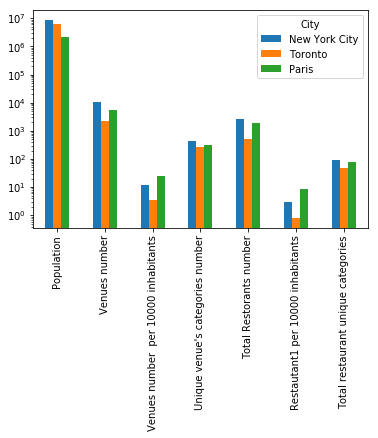

In [22]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
plt.figure(figsize=(35,15))
ax =df1_transposed.plot.bar(logy=True,rot=90)
plt.show()